# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

1. [Loading Libraries](#Loading_libraries)<br>
2. [Loading Dataset](#Loading_dataset)<br> 
    a .[Loading Head](#Loading_dataset_head)<br> 
    b. [Loading Tail](#Loading_dataset_tail)<br>
    c. [Descriptive Statistic](#Loading_descriptive_statistics)<br>
    d. [Dataset_shape](#dataset_shape)
3. [Separating Columns into Numerical and Categorical](#Separating_cols)
4. [Checking Missing Values](#checking_missing_values)
5. [EDA](#EDA)<br>
    a.[Uni-variate Analysis](#uni_variabte_analysis)<br>
    b.[Bi-variate Analysis](#bi_variate_analysis)<br>
    c.[Multi-variate Anaysis](#Multi_variate_analysis)
6. [Checking Outliers and Handling](#handling_outiers_and_checking)
7. [Transforming Features to achieve Normal Distribution](#transforming_features)
8. [Transforming Data for Linear Model i.e Linear Regression ](#transforming_data_forlinear_reg)<br>
     8.a [Calculating Variance Inflation Factor](#Calculating_Variance_inflation_Factor)<br>
     8.b [Splitting test train data for Linear Regression](#spitting_data_forlinear_model)<br>
     8.c [Linear Regression model results](#linear_reg_results)<br>
     8.d [Conclusion for Linear Regression](#conclusion_forLinear_reg)
9. [Data Tranformation for non linear model Ex(Decision Tree ,Random Forest,AdaBoost,XGboost)](#Data_transformation_for_non_linear_models)<br>
    9.a[Splitting data for Decision Tree, ensemble model techniques](#split_data_non_linear)
10. [Hyper Parameter Tuning](#hyper_parameter_tuning)<br>
    10.a [Decision Tree](#hypertuning_Decision_tree) <br>
    10.b [Random Forest](#hypertuning_Random_forest)<br>
    10.c [XGboost](#hypertuning_XGBoost) <br>
    10.d [Gradient Boost](#hypertuning_GbBoost)<br>
    10.e [AdaBoost](#hypertuning_AdaBoost)<br>
11. [Model Performance](#model_performance1)<br>
12. [Checking Expectation of Models accuracy in 95% of cases](#check_ci1)<br>
    12.a [Model Performance Above 70% Accuracy](#model_performance_Above_70_1)<br>
    12.b [Accuracy Score Distribution of Decision Tree](#score_distribution_Decision_tree)<br>
    12.c [Accuracy Score Distribution of Random Forest](#score_distribution_Random_Forest)<br>
    12.d [Accuracy Score Distribution of XGBoost](#score_distribution_XGBoost)<br>
    12.e [Accuracy Score Distribution of Gradient Boost](#score_distribution_Gradient_Boost)<br>
    12.d [Feature Importance of Models](#features_importance)
13. [Models Performance Chart](#display_model_performance)
14. [Accuracy Expectations Chart(Confidence Interval 95 %)](#CI_model_performance)
***15 .[CONCLUSION](#final_conclusion)***
    
 



    



<a id='Loading_library'></a>
# 1. Loading all the libraries required for the project

In [457]:
# importing the libraries that are needed for the project
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt # for plotting graphs 
import seaborn as sns # for plotting graphs

import warnings # for ignoring warnings
from sklearn.model_selection import train_test_split # for splitting the data into train and test
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error # for evaluating the model
warnings.filterwarnings('ignore')
import scipy.stats as stats # for statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor # for calculating VIF
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV # for cross validation
from sklearn.model_selection import cross_val_score # for cross validation 
import datetime

# MODELS
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.tree import DecisionTreeRegressor # for decision tree regression
from sklearn.ensemble import RandomForestRegressor # for random forest regression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor# for gradient boosting regression, AdaBoost regression
from xgboost import XGBRegressor # for xgboost regression


# 2. Loading the dataset
<a id='Loading_dataset'></a>

In [533]:
# loading the dataset (Bike sharing data)
bike_data=pd.read_csv('SeoulBikeData.csv') # reading the data from the csv file
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id='Loading_dataset_head'></a>

In [534]:
bike_data.head() # to see the first 5 rows of the data

Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

<a id='Loading_dataset_tail'></a>

In [535]:
bike_data.tail() # to see the last 5 rows of the data

Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [461]:
bike_data.info() # to see the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<a id="dataset_shape"></a>

In [462]:
bike_data.shape # to see the shape of the data

(8760, 14)

<a id="Loading_descriptive_statistics"></a>

In [463]:
bike_data.describe().T # to see the statistical summary of the data

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(�C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(�C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(�C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(�C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [464]:
# converting the date column to datetime format
bike_data["Date"]=pd.to_datetime(bike_data["Date"],format='%d/%m/%Y')

# Extracting the month and day from the date column
bike_data["Month"]=bike_data["Date"].dt.month
bike_data["Day"]=bike_data["Date"].dt.day

In [465]:
# Droping the date column
# bike_data.drop(["Date"],axis=1,inplace=True)

<a id="Separating_cols"></a>
## 3 Grouping the numerical and categorical data into separate variables
- cat_columns(categorical columns) 
- numerical_columns

In [487]:
cat_columns=[col for col in bike_data.columns if bike_data[col].dtype=="O"] # finding the categorical columns
numerical_columns=[col for col in bike_data.columns if bike_data[col].dtype!="O"] # finding the categorical columns
 # printing the categorical columns
print("Printing the categorical columns\n",cat_columns)
# printing the numerical columns
numerical_columns.remove("Date")
print("\nPrinting the numerical columns\n",numerical_columns)

Printing the categorical columns
 ['Seasons', 'Holiday', 'Functioning Day']

Printing the numerical columns
 ['Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day']


<a id ="checking_missing_values"></a>
# 4. Checking for Missing values

In [488]:
bike_data.isna().sum() # to see the number of missing values in each column

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
Day                          0
dtype: int64

# No NAN Values!!!
- As there are no NAN values in the dataset, But also we can't use the dataset as it is.
- Suppose that there might be missing data entered as ? or given value as 0, then we can't use the dataset as it is.
- So let’s try finding the values like 0 and ‘?’ replace them with sensitive values which make sense
- 0 can be considered as a missing value depending on the context or domain knowledge.


In [489]:
def print_missing_values(df,value):
    '''
    1st argument: dataframe
    2nd argument: value
    This function returns count of the rows in the dataframe which contains the 'value' i.e the second argument

    '''
    return pd.DataFrame(({"Rows":(df==value).sum(),"% of occurance":(df==value).sum()
    /df.shape[0]*100})).sort_values(ascending=False,by="% of occurance")



In [490]:
# to see the number of missing values in each column with the value "?"
print_missing_values(bike_data,"?")

Rows  % of occurance
Date                          0             0.0
Rented Bike Count             0             0.0
Hour                          0             0.0
Temperature(�C)               0             0.0
Humidity(%)                   0             0.0
Wind speed (m/s)              0             0.0
Visibility (10m)              0             0.0
Dew point temperature(�C)     0             0.0
Solar Radiation (MJ/m2)       0             0.0
Rainfall(mm)                  0             0.0
Snowfall (cm)                 0             0.0
Seasons                       0             0.0
Holiday                       0             0.0
Functioning Day               0             0.0
Month                         0             0.0
Day                           0             0.0

In [491]:
# to see the number of missing values in each column with the value 0
print_missing_values(bike_data,0)


Rows  % of occurance
Snowfall (cm)              8317       94.942922
Rainfall(mm)               8232       93.972603
Solar Radiation (MJ/m2)    4300       49.086758
Hour                        365        4.166667
Rented Bike Count           295        3.367580
Wind speed (m/s)             74        0.844749
Dew point temperature(�C)    60        0.684932
Temperature(�C)              21        0.239726
Humidity(%)                  17        0.194064
Date                          0        0.000000
Visibility (10m)              0        0.000000
Seasons                       0        0.000000
Holiday                       0        0.000000
Functioning Day               0        0.000000
Month                         0        0.000000
Day                           0        0.000000

## The zero values is present in all the rows. 
- Before accepting the zero as real values we need to analyse each columns through the domain knowledge.
- So we need to check the data and remove the rows or columns with zero values. depending upon the dataset
- Having Snowfall, Rainfall, Solar radiation, Windspeed, Dewpoint, Humidity, Temperature, Dew point and temperature as 0 can be accepted and they are not missing values


<a id="EDA"></a>
# 5. EDA

<a id="uni_variabte_analysis"></a>
## 5.a Univariate Analysis

In [492]:
def plot_distributions_outliers(df,columns,x_label,hue="Seasons"):
    '''
    1st argument: dataframe
    2nd argument: columns
    3rd argument: title
    This function plots the 3 distributions view of the columns in the dataframe
    1st plot : Histogram plot
    2nd plot : Box plot
    3rd plot : Histogram plot with insights to check of over lapping guassiasns with respect seasons
    '''
    # creating a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # plotting the histogram of the columns
    hist_plot1=sns.histplot(data=df,x=columns,ax=axes[0]) # plotting the histogram plot
    hist_plot1.set_xlabel(x_label,fontsize=15)  # setting the x-label
    hist_plot1.set_title("Histogram Plot 1",fontsize=15) # setting the title

    # plotting the box plot of the columns
    hist_plot2=sns.boxplot(data=df,x=columns,ax=axes[1]) # plotting the box plot
    hist_plot2.set_xlabel(x_label,fontsize=15)  # setting the x-label
    hist_plot2.set_title("Boxplot",fontsize=15) # setting the title


    # plotting the histogram of the columns with the insights to check of over lapping guassians
    hist_plot3=sns.histplot(data=bike_data,x=columns,hue=hue,ax=axes[2]) 
    hist_plot3.set_xlabel(x_label,fontsize=15) # setting the x-label
    hist_plot3.set_title("Histogram Plot 2",fontsize=15) # setting the title


# plotting the distributions of Visibility during each season
def plot_distribution_season_wise(columns,x_label):
    '''
    1st argument: columns : name of the column 
    2nd argument: x-label : name of the x-label
    '''
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes_no=0
    for i in bike_data["Seasons"].unique(): # iterating over the seasons
        filtered_by_season=bike_data[bike_data["Seasons"]==i]   # filtering the data by the season
        histplot_1=sns.histplot(filtered_by_season,x=columns,ax=axes[axes_no]) # plotting the histogram plot
        histplot_1.set_xlabel(f"{x_label} during {i}",fontsize=15)  # setting the x-label
        axes_no+=1 # incrementing the axes_no




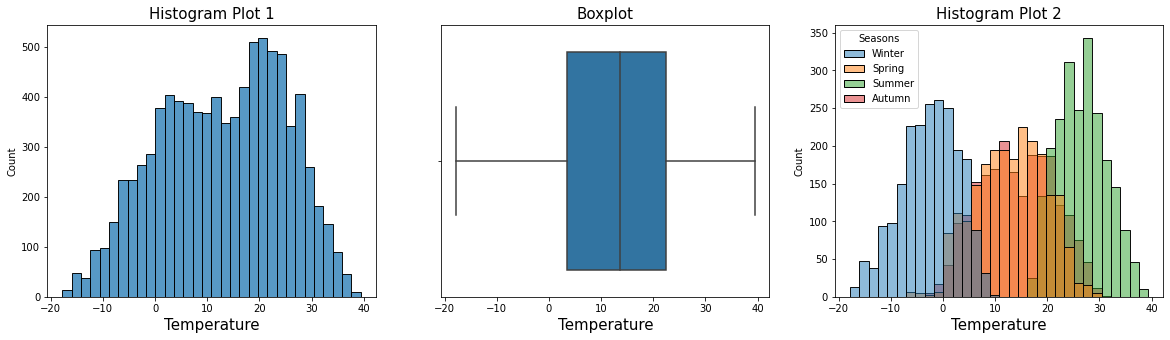

In [493]:
# plotting the distributions of the columns
plot_distributions_outliers(bike_data,"Temperature(�C)","Temperature")  

##### Histogram Plot 1
- You can see the normal distribution of the data with some over lapping of 
- There are no tails at the end of the distribution.(that means no skew) 
- So we can confirm that there wont be any outliers.
##### Boxplot
- There are no outliers in the data.
##### Histogram Plot 2 (Hue:Season)
- There are mix of Guassians (Normal distribution of different season) But no outliers in the data.
- You can see the normal distrubution of the data.

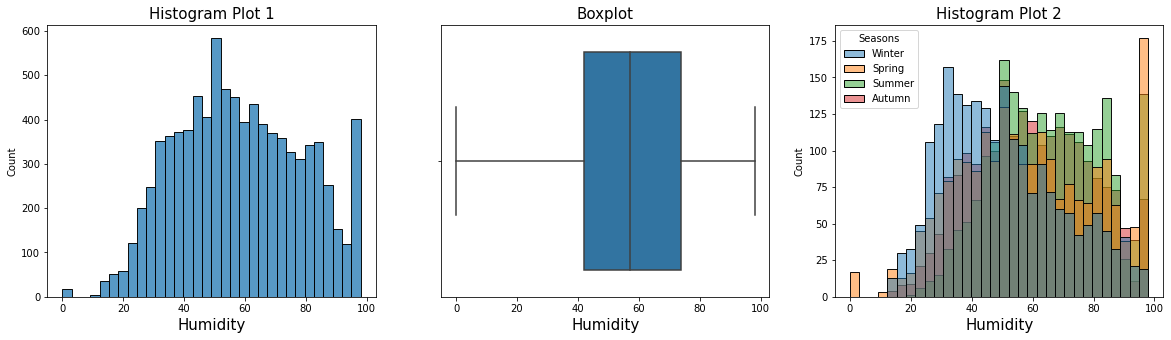

In [494]:
plot_distributions_outliers(bike_data,"Humidity(%)","Humidity") # plotting the distributions of the Humidity

##### Histogram Plot 1
- There is a small tail towards the left (negligible).
##### Boxplot
- There are no outliers in the data.
##### Histogram Plot 2 (Hue:Season)
- There are mix of Guassians (Normal distribution of different season closely overlapping) But no outliers in the data.

- Guassians overlapping on eachother but there are not producing any outliers.

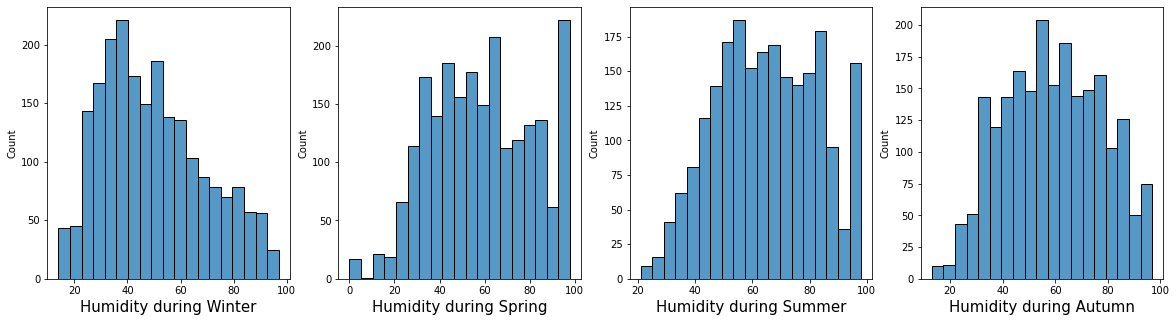

In [495]:
# plotting the distributions of the Humidity wrt different seasons
plot_distribution_season_wise("Humidity(%)","Humidity") 

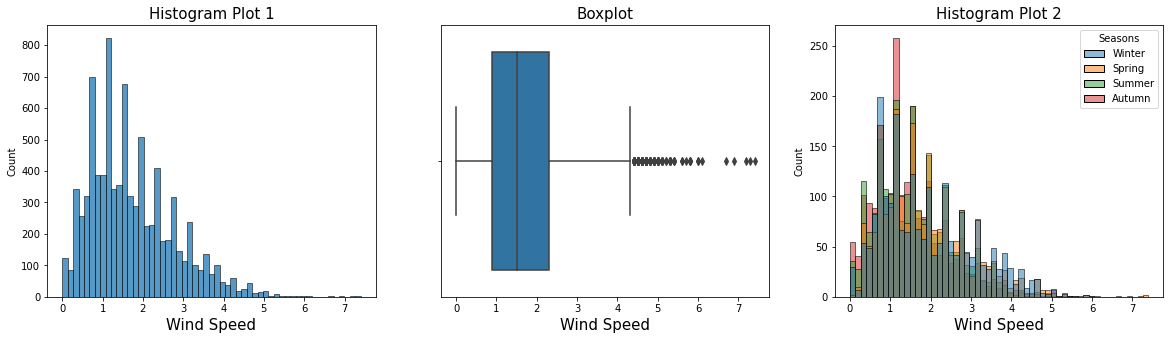

In [496]:
 # plotting the distributions of the Wind Speed
plot_distributions_outliers(bike_data,"Wind speed (m/s)","Wind Speed")

##### Histogram Plot 1
- Wind Speed is skewed towards the right. we can expect some outliers. 
##### Boxplot
- There are  outliers in the data towards the right.

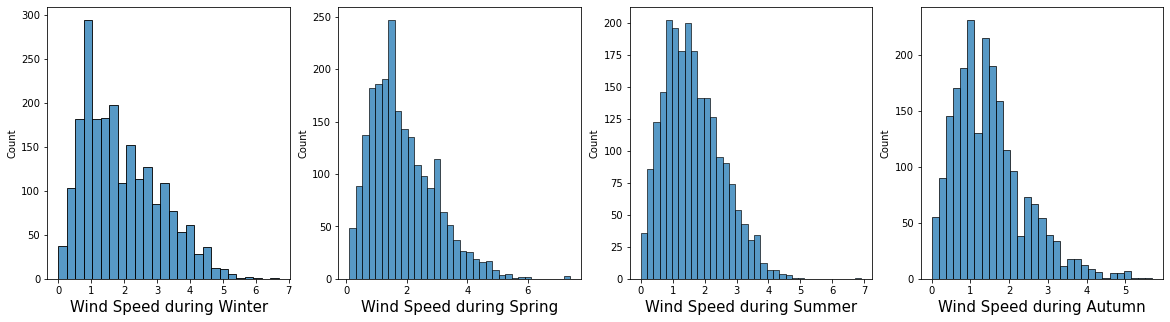

In [497]:
 # plotting the distributions of the Wind Speed wrt different seasons
plot_distribution_season_wise("Wind speed (m/s)","Wind Speed")

- All seasons have same way of distribution.

- points at the tail towards the right are outliers related to all the seasons
- So handling the outliers will not affect the data much.

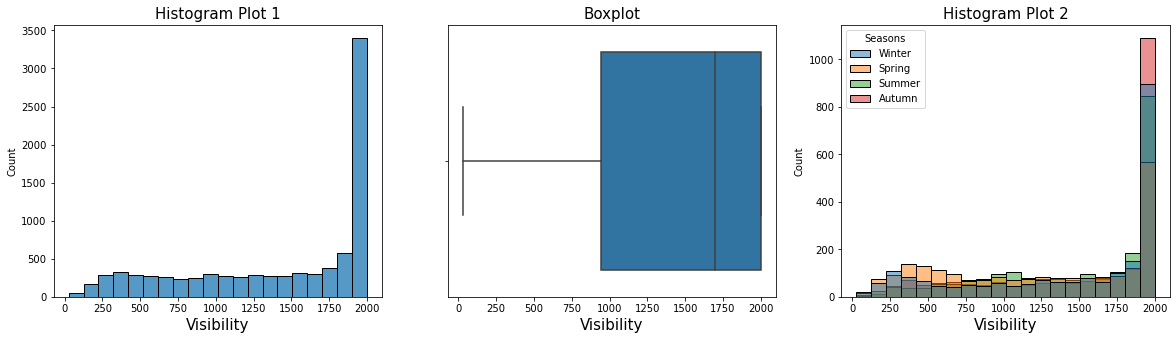

In [498]:
# plotting the distributions of the Visibility
plot_distributions_outliers(bike_data,"Visibility (10m)","Visibility")


- There are no outliers in the data.
- But the variable is skewed towards the left and is not guassian distribution.

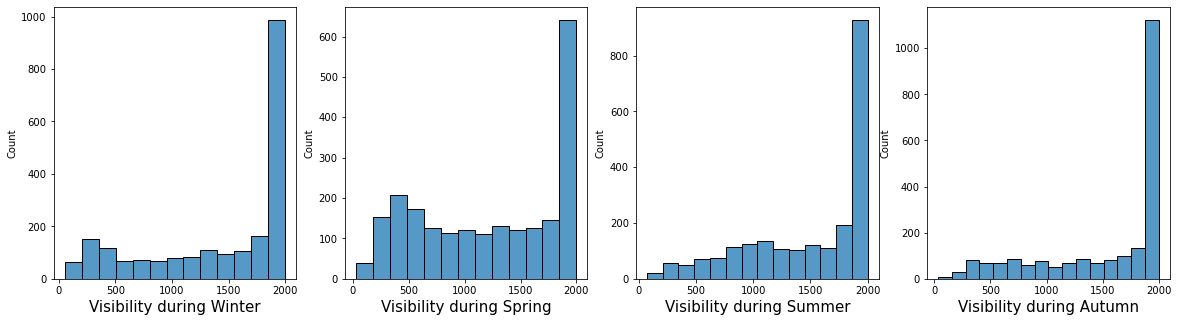

In [499]:
# plotting the distributions of the Visibility wrt different seasons
plot_distribution_season_wise("Visibility (10m)","Visibility")

- Visibility Issues have been caused mostly during Winter and Autumn which might result in decrease of the Rent bike count

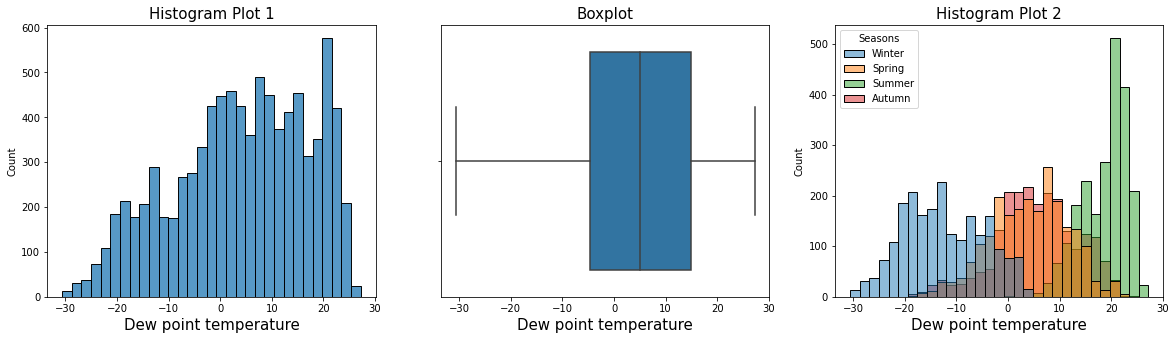

In [500]:
# plotting the distributions of  Dew Point Temperature
plot_distributions_outliers(bike_data,"Dew point temperature(�C)","Dew point temperature")

- There are no outliers and guassians of seasons are overlapping

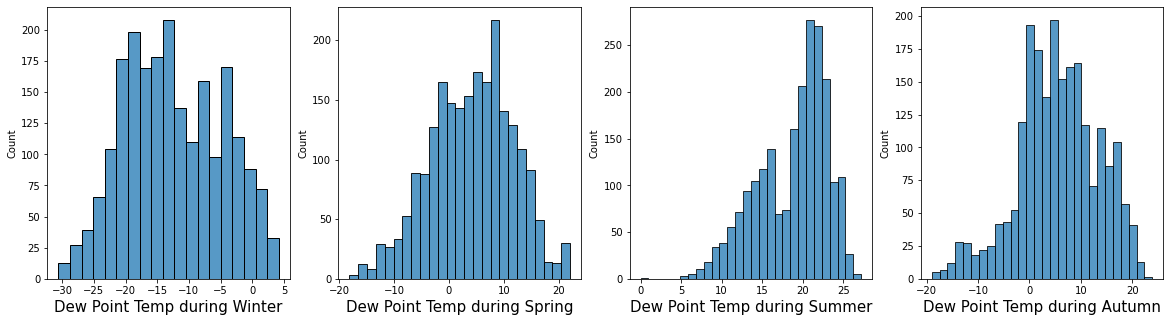

In [501]:
# plotting the distributions of the Dew point Temperature wrt different seasons
plot_distribution_season_wise("Dew point temperature(�C)","Dew Point Temp")


- Due point Temperature have the same guassian distribution during all the seasons

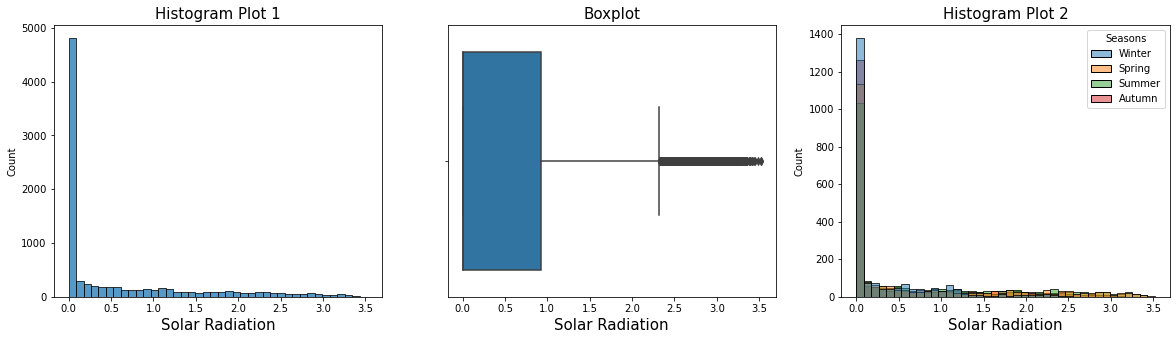

In [502]:
# plotting the distributions of the Solar Radiation
plot_distributions_outliers(bike_data,'Solar Radiation (MJ/m2)',"Solar Radiation")

- the distribution is not guassian.
- It has a tail towards the right (Right skewed).
- Some times there might be more solar radiation which occurs rarely

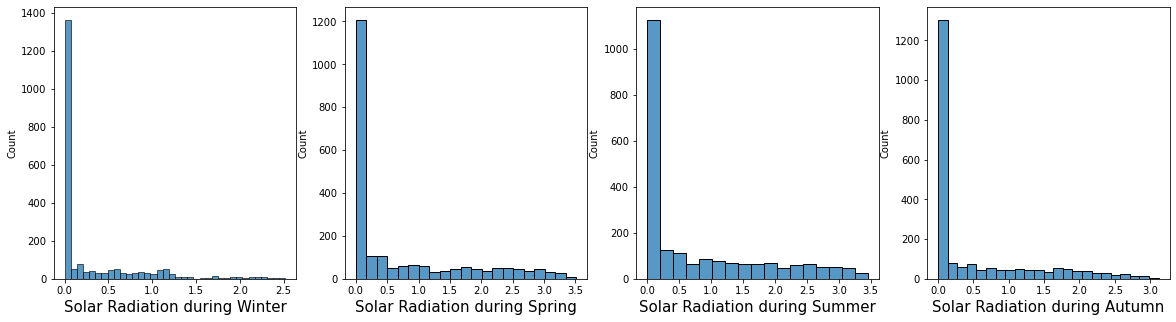

In [503]:
# plotting the distributions of the Solar Radiation wrt different seasons
plot_distribution_season_wise("Solar Radiation (MJ/m2)","Solar Radiation")


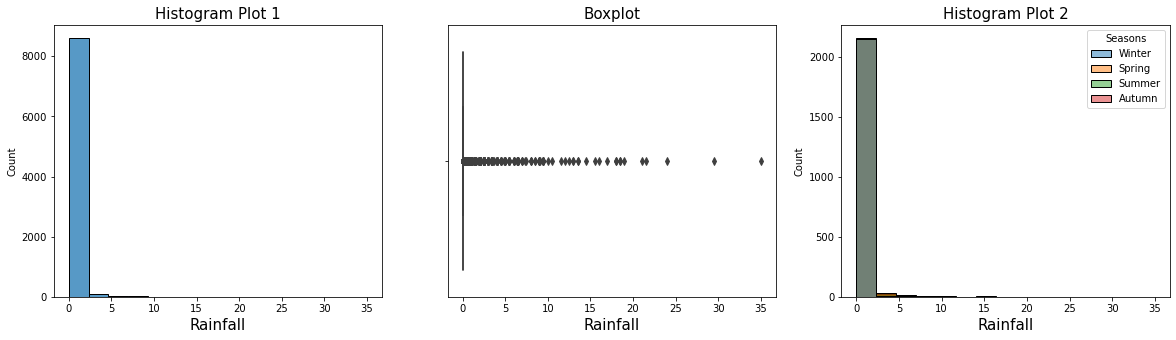

In [504]:
# plotting the distributions of  Rain Fall
plot_distributions_outliers(bike_data, 'Rainfall(mm)','Rainfall')


- Rain fall is zero mm in most of the days and this is normal 
- Occurrence of rain can only happen in in rainy seasons and rarely on other seasons

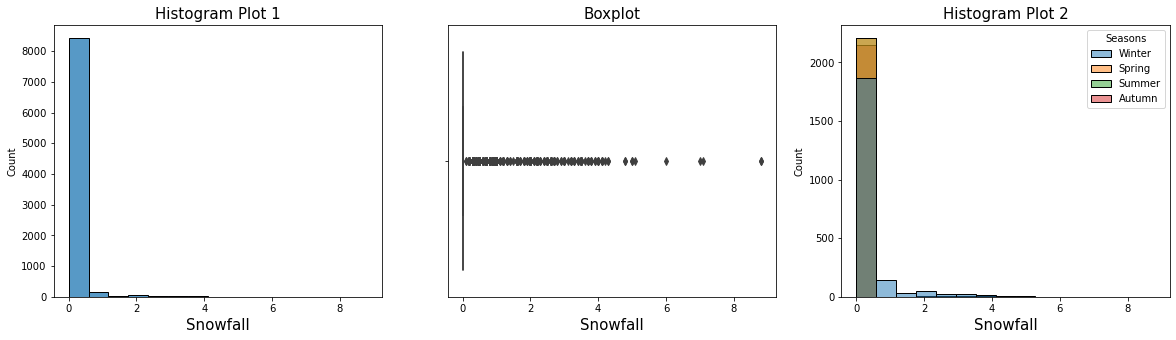

In [505]:
# plotting the distributions of the Snow Fall
plot_distributions_outliers(bike_data, 'Snowfall (cm)','Snowfall')


- By univariate analysis we can see that there are outliers in features like Solar radiation, Windspeed, Snowfall, Rainfall.
- The data is not randomly distributed 
- Assumptions of linear regression that normal distribution is not there in most of the features

<a id="bi_variate_analysis"></a>
## 5.b Bivariate analysis

In [506]:
def plot_scatter_plot(x,y,x_label,y_label,title="Scatter Plot"):
    """This functions plots the scatter plot of the x and y values with the x-label and y-label and title
    Args:
        x ([column]): col for x axis
        y ([column]): col for y axis
        x_label ([x axis label])
        y_label ([y axis label])
        # title ([title of the scatter])
    """
    fig, ax = plt.subplots(1,2 ,figsize=(20, 5))
    scatterplot_1=sns.scatterplot(hue="Seasons",x=x,y=y,data=bike_data,ax=ax[0]); # plotting the scatter plot
    scatterplot_1.set_xlabel(x_label,fontsize=15) # setting the x-label for the scatter plot1
    scatterplot_1.set_ylabel(y_label,fontsize=15) # setting the y-label for the scatter plot1
    scatterplot_1.set_title(title,fontsize=15) # setting the title of the scatter plot1
    prob_plt=stats.probplot(bike_data[x],dist="norm",plot=ax[1]) # plotting the qq plot
    plt.title(f"QQ plot for {x_label}",fontsize=15) # setting the title for the qq plot
    plt.show() # showing the plots
    
    

#### Lets plot the scatter plot of Other features with Rented Bike count(Target variable) 
#### And with QQplot of feautures (its show how vastly the data is been distributed)

<AxesSubplot:xlabel='Date'>

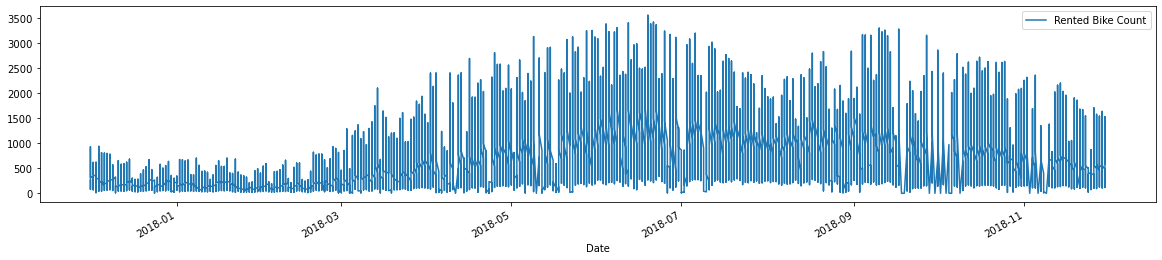

In [507]:

bike_data.plot(x="Date",y="Rented Bike Count",figsize=(20,4))


- Bike sales has increased gradually after the month March

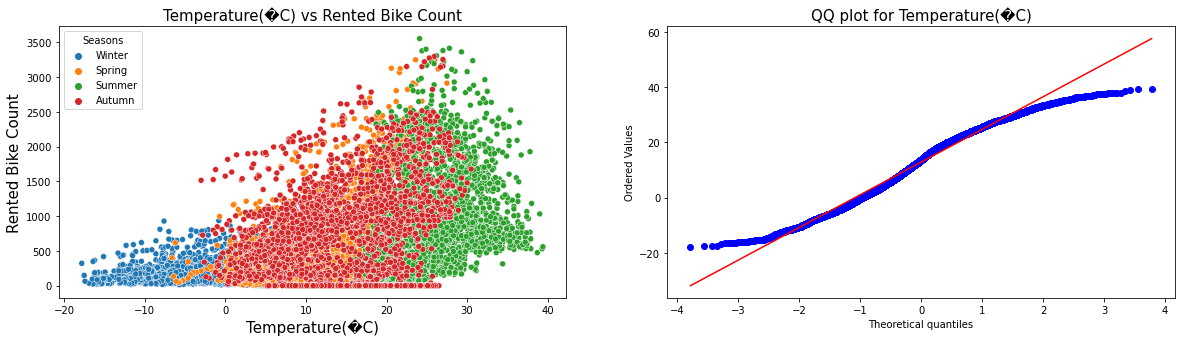

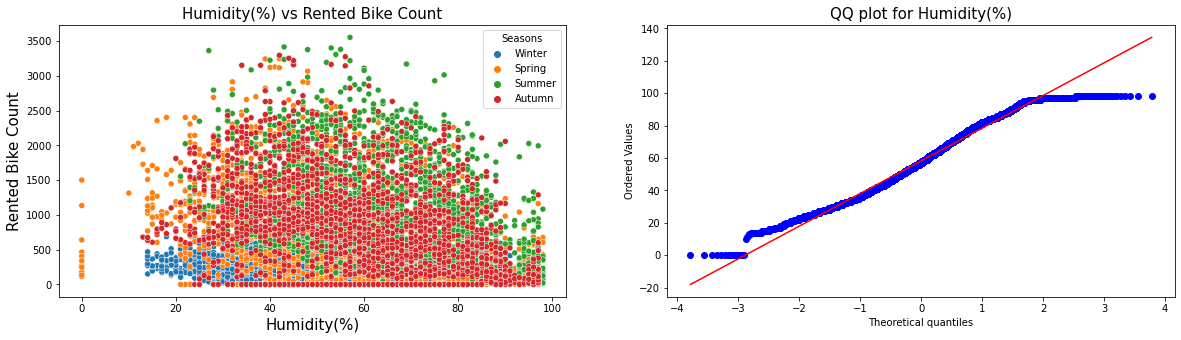

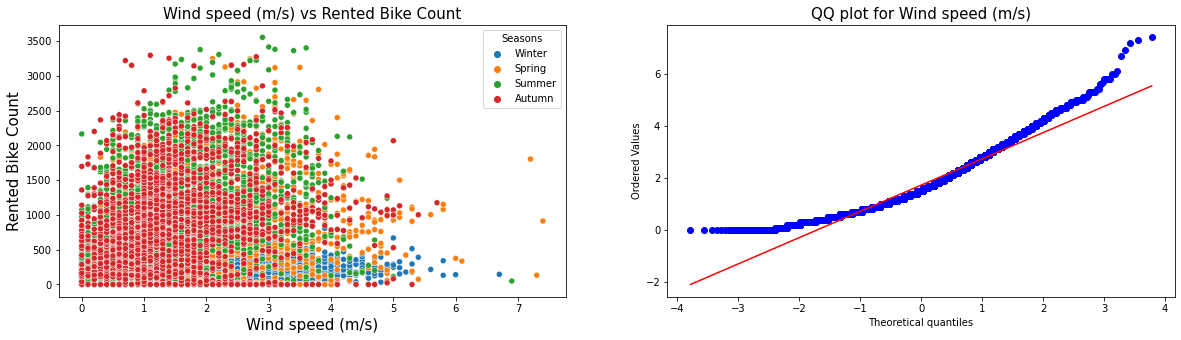

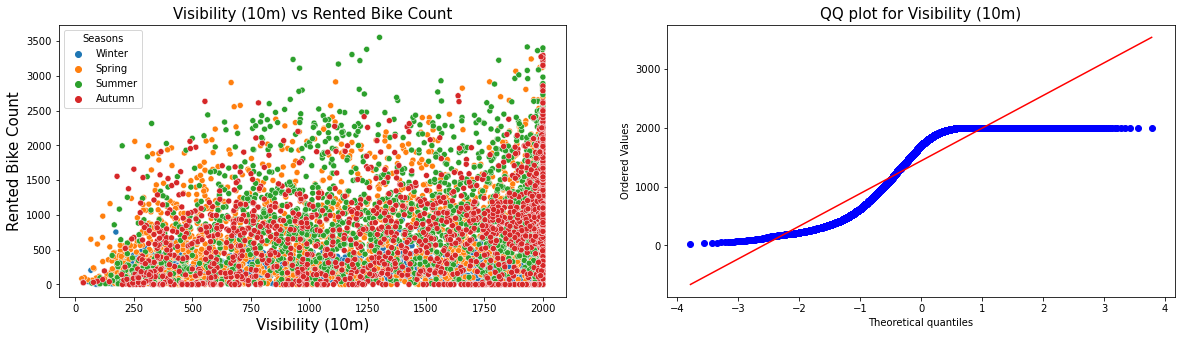

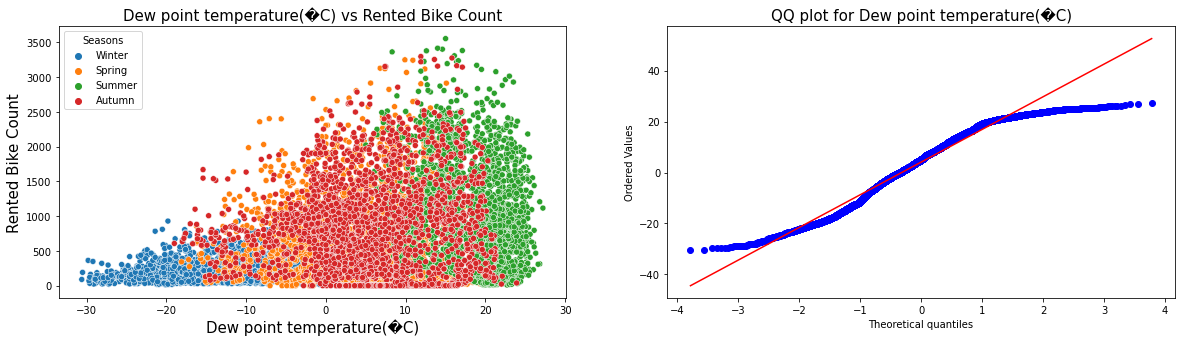

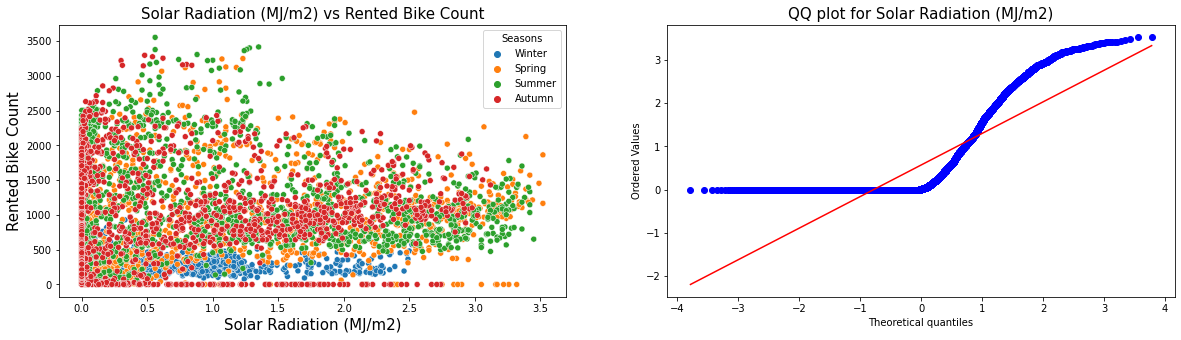

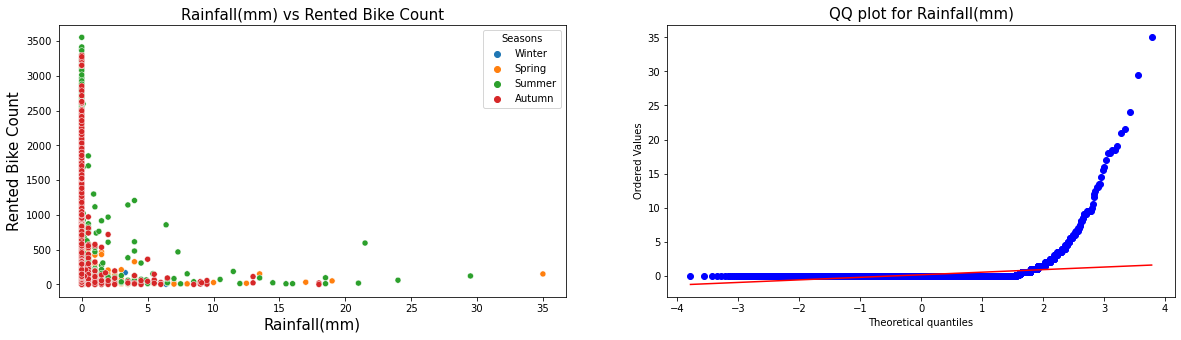

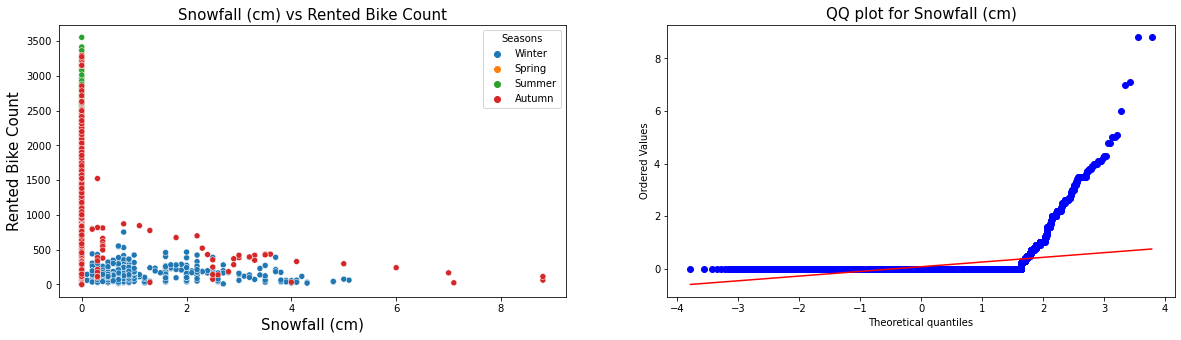

In [508]:
# plotting the scatter plot with all features to target variable and QQplot of the all features
for n,i in enumerate([i for i  in numerical_columns if i not in ["Day","Month","Hour","Rented Bike Count"]]):
    plot_scatter_plot(i,"Rented Bike Count",i,"Rented Bike Count",f"{i} vs Rented Bike Count")

- ***Snowfall and Rainfall*** are having negative trend for the count of the bike rent per hour.
- ***Temperature and Due point Temperature*** have positive correlation with the target variable
- i.e the bikes are used more during less rain fall and snow fall.
- QQ plot indicates how vastly the data like **Rain Fall**, **Snow Fall** **Solar Radiation** is been distributed and they have not distributed normally?

<a id="Multi_variate_analysis"></a>
## 5.c Multi-variate analysis

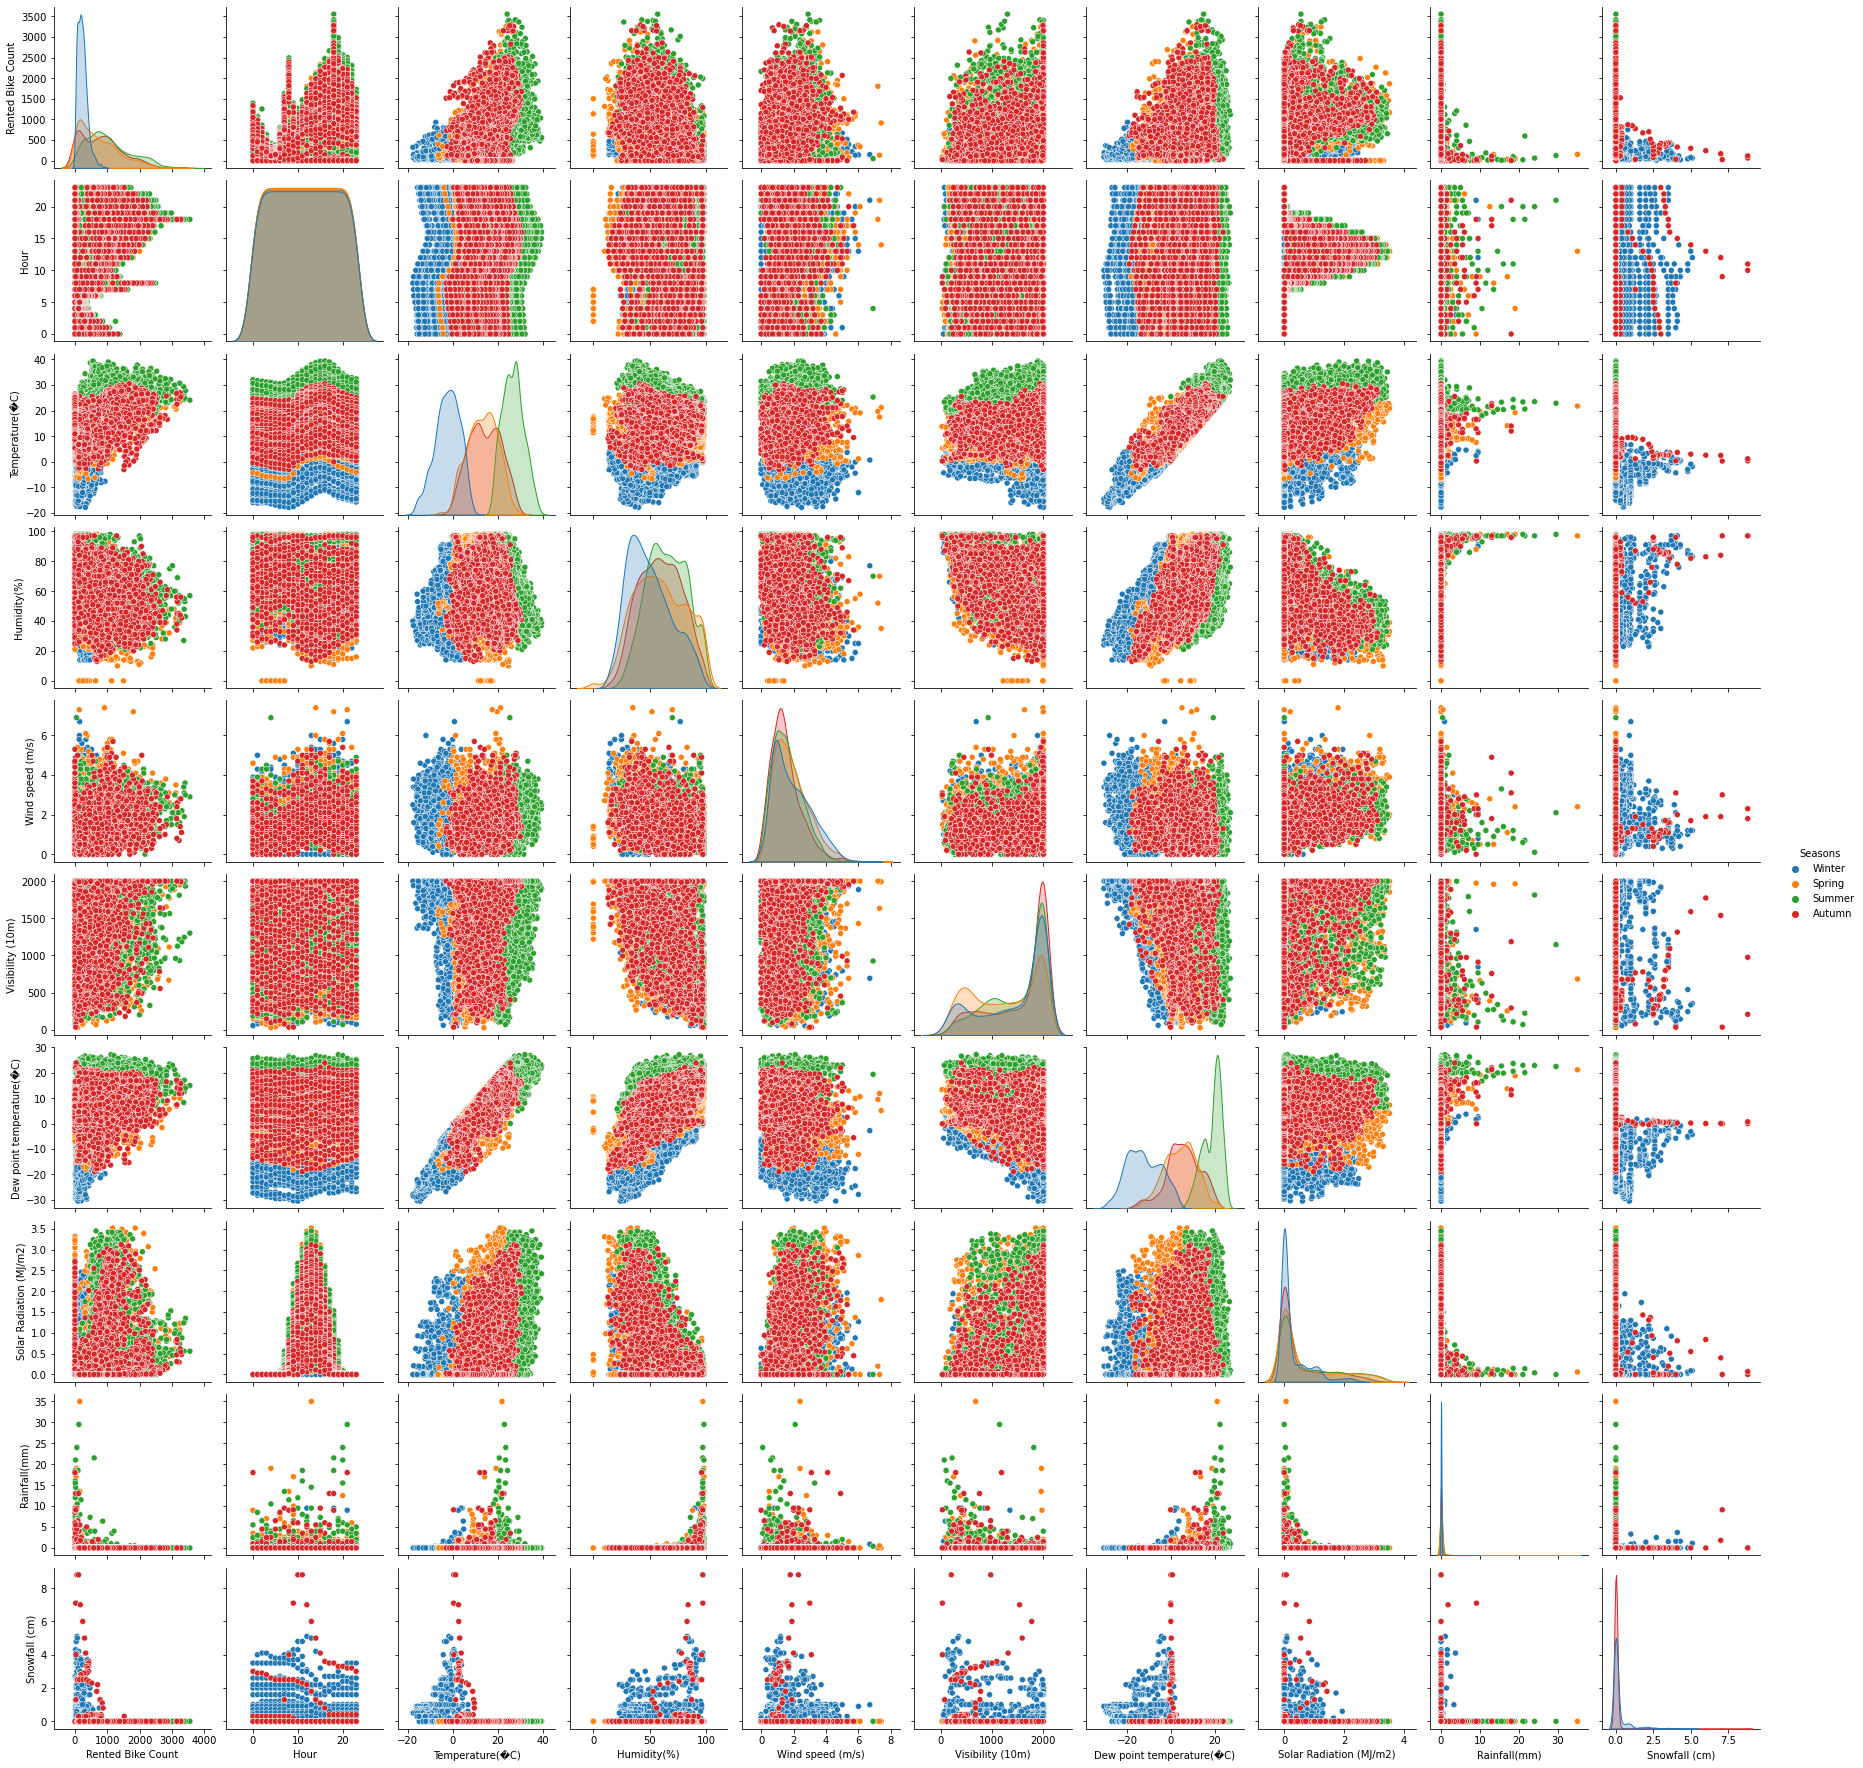

In [537]:
sns.pairplot(bike_data,hue="Seasons",diag_kind='kde')

In [287]:
def plot_details(x_label="",y_label="",Title=""):
    """This Functions set the label for X and Y axis with title and figure size

    Args:
        x_label ([String]): [Label for X axis]
        y_label ([String]): [Label for Y axis]
        Title ([String]): [Title of the plot]
    """
    if(x_label!=""):                     # checking if the x_label is not empty
        plt.xlabel(x_label,fontsize=15)  # setting the x-label
    if(x_label!=""):                     # checking if the y_label is not empty
        plt.ylabel(y_label)             # setting the y-label
    if(Title!=""):                      # checking if the title is not empty
        plt.title(Title,fontsize=15)    # setting the title
    plt.show()                          # showing the plot
    

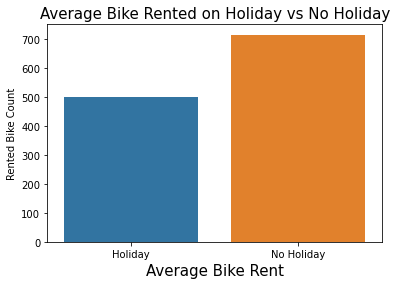

In [288]:
sns.barplot(data =bike_data.groupby("Holiday").mean(),x=bike_data.groupby("Holiday").mean().index,y="Rented Bike Count")
plot_details("Average Bike Rent","Rented Bike Count","Average Bike Rented on Holiday vs No Holiday")

- Average Bikes rented compared with normal days is more compared in Holidays

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

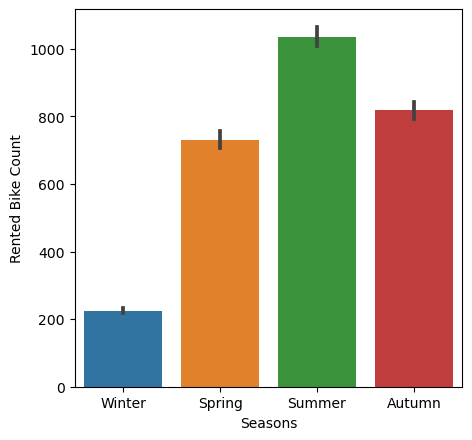

In [289]:
plt.figure(figsize=(5,5),dpi=100)
sns.barplot(data=bike_data,y="Rented Bike Count",x="Seasons")

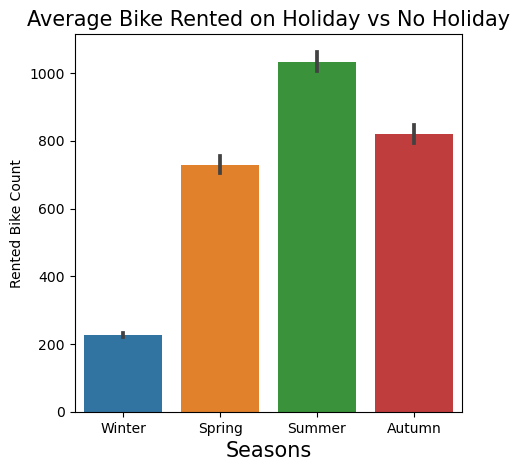

In [511]:
plt.figure(figsize=(5,5),dpi=100)
sns.barplot(data=bike_data,y="Rented Bike Count",x="Seasons")
plot_details("Seasons","Rented Bike Count","Average Bike Rented on Holiday vs No Holiday")

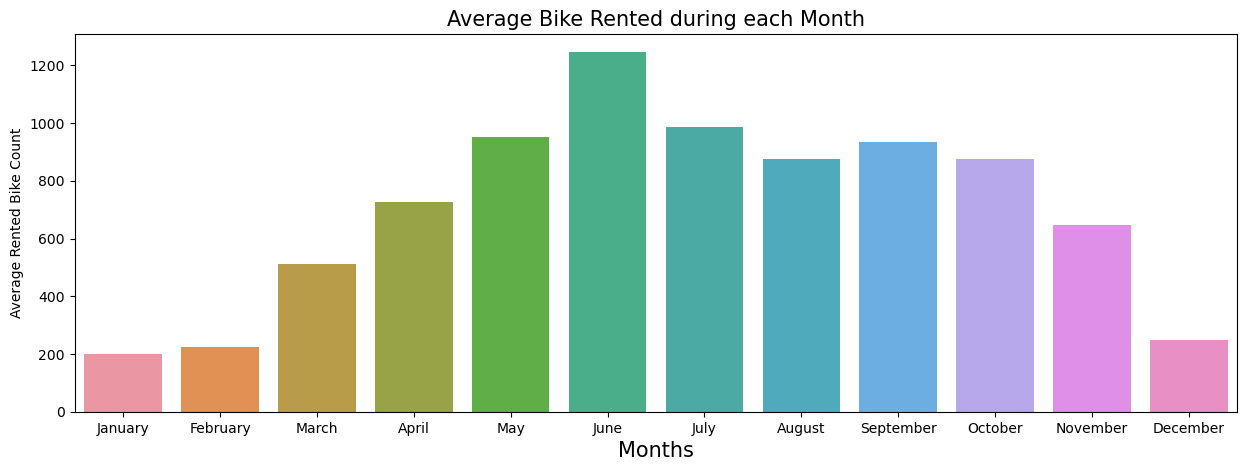

In [512]:
plt.figure(figsize=(15,5),dpi=100)
data=bike_data.groupby("Month").mean().reset_index()[["Month","Rented Bike Count"]]
data["Month"]=data["Month"].apply(lambda x :datetime.datetime.strptime(str(x), "%m").strftime("%B"))
sns.barplot(data=data,x="Month",y="Rented Bike Count")
del data
plot_details("Months","Average Rented Bike Count",
             "Average Bike Rented during each Month")

- Most of the bikes are rented in the month of June
- Bikes rented is less in winter season  like in the month of December,January and February

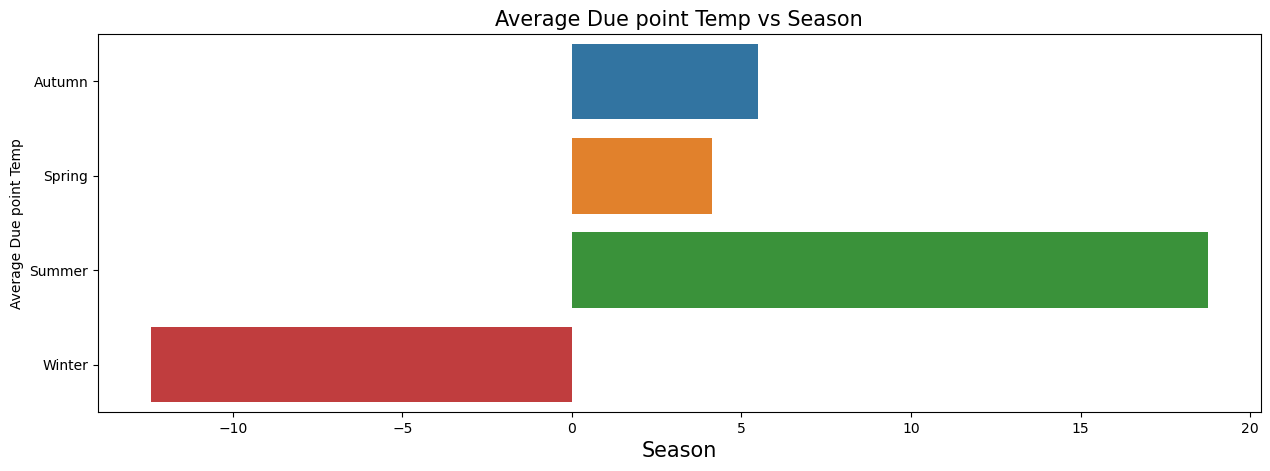

In [513]:
plt.figure(figsize=(15,5),dpi=100)
sns.barplot(data=bike_data.groupby("Seasons").mean("Dew point temperature(�C)").reset_index()[["Dew point temperature(�C)","Seasons"]],
               x="Dew point temperature(�C)",y="Seasons")
plot_details("Season","Average Due point Temp",
             "Average Due point Temp vs Season")

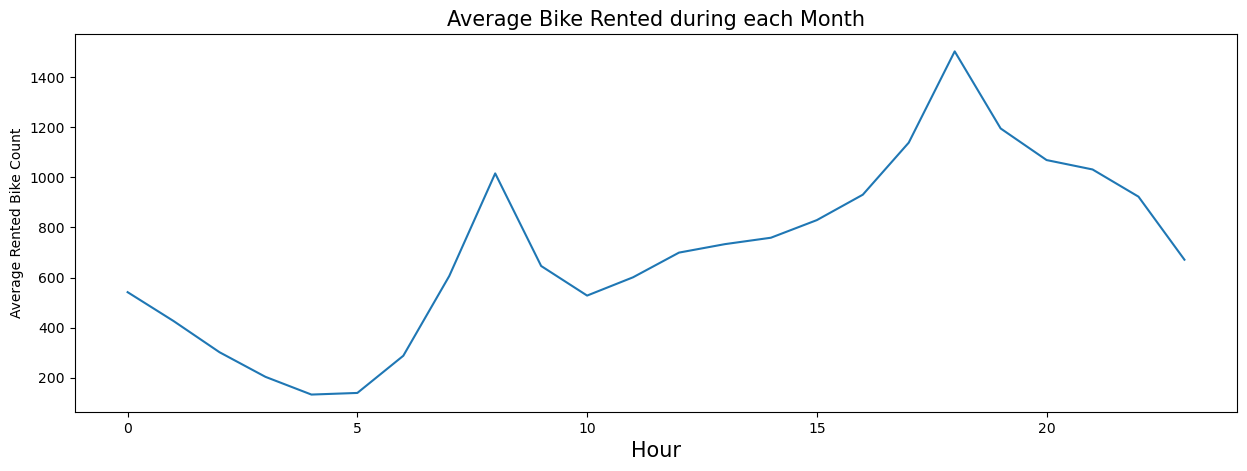

In [514]:
plt.figure(figsize=(15,5),dpi=100)
data=bike_data.groupby("Hour").mean().reset_index()[["Hour","Rented Bike Count"]]
sns.lineplot(data=data,x="Hour",y="Rented Bike Count")
del data
plot_details("Hour","Average Rented Bike Count",
             "Average Bike Rented during each Month")

- Most of the bikes are used during morning and evening time

<a id="handling_outiers_and_checking"></a>
# 6. Checking and Handling Outliers
#### Outliers are present in
- Wind Speed
- Solar Radiation
- Rain fall
- Snow fall

## Handling Outlier (an attempt to check the performance through linear model) Ex: Linear Regression

In [515]:
# OUTLIER HANDLING PART
def handle_outlier(df,column,upper_quantile,first_limit=.99,second_limit=.98):
    """This functions takes dataframe column and takes 2 quantiles(first limit and second limit)
    and returns the dataframe with outlier removed
    first quantile (first_limit) is used to remove the outliers that are far from upper whisker
    second quantile (second_limit) is used to impute the outliers that are nearer to the whisker
    Steps:
    1. Plot the histogram of the column before handling the outliers (Plot 1)
    2. Plot the boxplot of the column before handling the outliers (Plot 2)
    3. Remove the Outliers that are far from the upper whisker 
    4. Plot the boxplot of the column after removing the outliers that are far(Plot 3)
    5. Impute the outliers that are nearer to the whisker
    6. Plot the boxplot of the column after imputing the outliers (Plot 4)
    7. Plot the histogram of the column after removing the outliers that are far(Plot 5)

    Args:
        df ([Dataframe]): [Dataframe to be handled]
        column ([String]): [Column to be handled]
        first_limit ([float]): [First limit (Percentile) used to remove the outliers that are far] 
        second_limit ([float]): [Second limit(Percentile) to be used to impute to the nearest outliers]
    """
     # creating the subplots
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    # plotting the distribution of the column   
    plot1=sns.distplot(df[column],ax=axes[0]) 
    plot1.set_title("Before Handling Outlier",fontsize=15)  # setting the title of the plot1

    # plotting the box plot
    plot2=sns.boxplot(df[column],ax=axes[1])
    plot2.set_title("Outlier before handing",fontsize=15) # setting the title of the plot2

    # Deleting the outliers above first limit ( example 0.99 percentile) (that are far away from whisker)
    upper_quantile=df[column].quantile(first_limit) 
    df=df.loc[df[column]<=upper_quantile] # removing the outliers above first limit

    # plotting the box plot of the column
    plot3=sns.boxplot(df[column],ax=axes[2])
    plot3.set_title("Nearest Outlier after handing",fontsize=15) # setting the title of the plot3


    # Imputing the nearest outliers with the nearest whiskers
    upper_quantile=df[column].quantile(second_limit)
    df.loc[df[column]>upper_quantile,'Wind speed (m/s)']=upper_quantile # imputing the outliers with the nearest whiskers
    
    # plotting the box plot of the column
    plot4=sns.boxplot(df[column],ax=axes[3])    
    plot4.set_title("Outlier Imputed to whisker",fontsize=15) # setting the title of the plot4

    # plotting the distribution of the column
    plot5=sns.distplot(df[column],ax=axes[4])
    plot5.set_title("After Handling Outlier",fontsize=15)   # setting the title of the plot5
    return df

# TRANSFORMATION PART
log_transformation=lambda x,min:np.log(x+min)# log transformation
inverse_log_transformation=lambda x,min:(1/(np.log(x+min)))# log transformation
reciprocal_transformation=lambda x,min:1/(x+min) # reciprocal transformation
square_root_transformation=lambda x,min:np.sqrt(x+min)  # square root transformation
exponentail_transformation=lambda x,min:np.exp(x+min) # exponential transformation
# box_cox_transformation=lambda x,min:stats.boxcox(x+min)[0] # boxcox transformation

# Storing all the types of transformation in a list
list_of_transformations={"log":log_transformation,
                        "inverse_log":inverse_log_transformation,
                        "reciprocal":reciprocal_transformation,
                        "square_root":square_root_transformation, 
                        "exponentail":exponentail_transformation,
                        # "box_cox_transformation":box_cox_transformation
                        }
    

def transform_data_and_plot_dist(data,title,min=0):
    """This Function takes the data and transforms it using 5 transformations method 
    and plots the distribution of the transformed data in histogram and qq plot
    Args:
        data ([Series]): [Series of the data which needs transformation]
        title ([String]): [Column name ]
        min (int, optional): [This needs to be added with Series to avoid error while transforming negative value].
                             Defaults to 0.
    """
    fig , ax = plt.subplots(3,6,figsize=(25,8),squeeze=False) # creating a figure with 2 subplots
    sns.distplot(data,ax=ax[0,0])
    sns.boxplot(data,ax=ax[1,0])
    stats.probplot(data,dist="norm",plot=ax[2,0]) # plotting the qq plot on transformed data
    indeces=1
    plt.subplots_adjust(hspace = 0.8)
    # for loop to iterate over the list of transformations
    for transformations,transformation_func in list_of_transformations.items():
        # fig , ax = plt.subplots(1,2,figsize=(20,5)) # creating a figure with 2 subplots
        data=transformation_func(data,min)  # applying the transformation
        displot=sns.distplot(data,ax=ax[0,indeces]) # plotting the histogram on trasnformed data
        displot.set_title(f"{transformations} of {title}")
        sns.boxplot(data,ax=ax[1,indeces])
        stats.probplot(data,dist="norm",plot=ax[2,indeces]) # plotting the qq plot on transformed data
        # plt.title(f"{transformations} of {title}",fontsize=15) # setting the title of the plot
        indeces+=1

    

Total 840 rows is been removed due to outliers


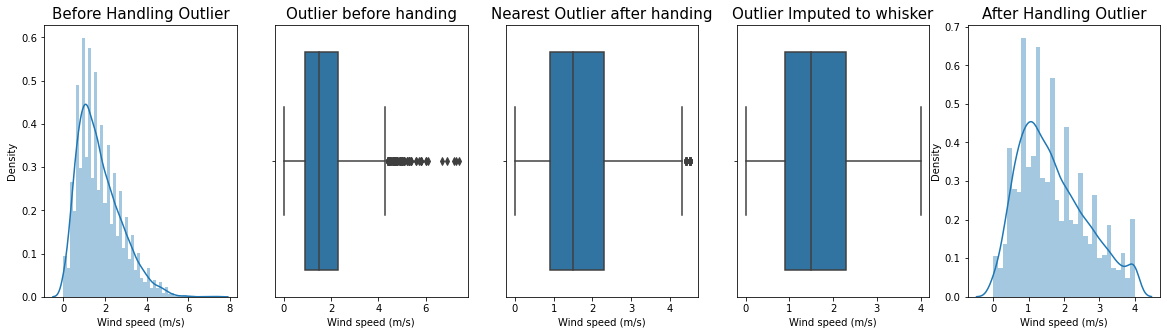

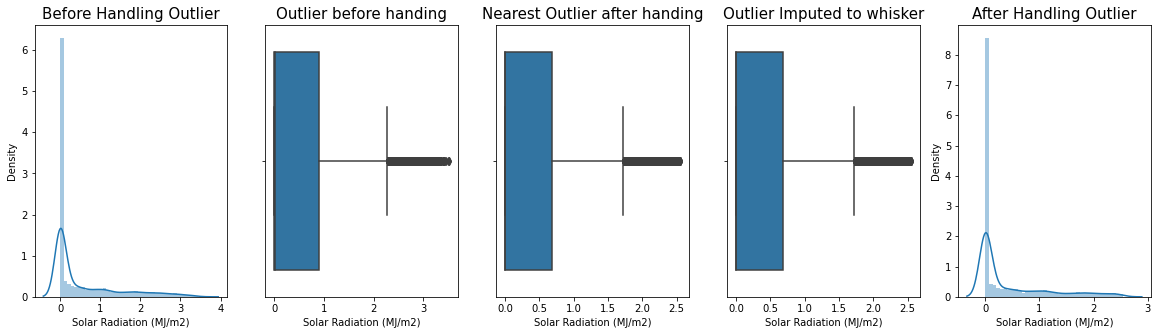

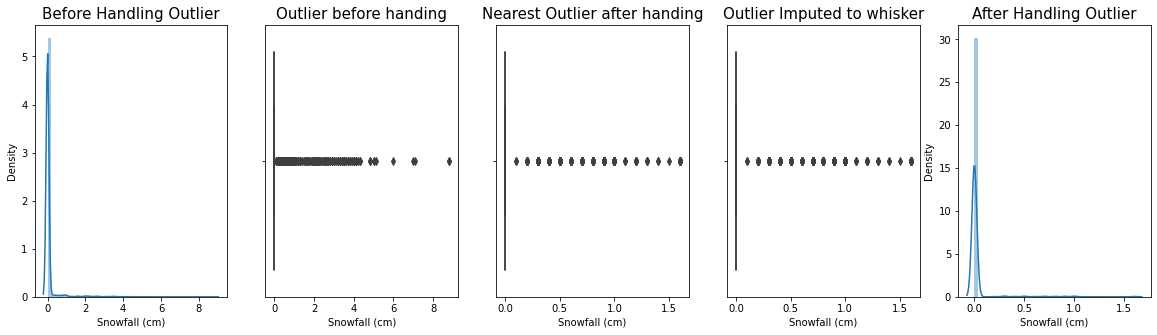

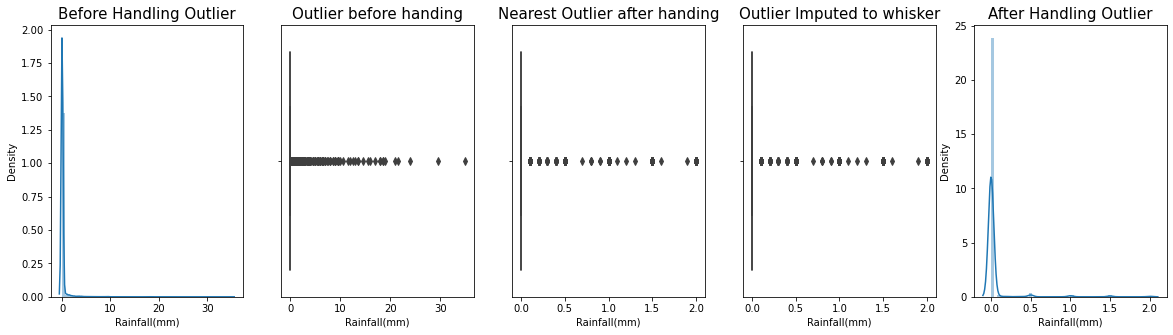

In [516]:
handled_data=handle_outlier(bike_data,"Wind speed (m/s)",.99,.985)
handled_data=handle_outlier(handled_data,"Solar Radiation (MJ/m2)",.95,.95)
handled_data=handle_outlier(handled_data,"Snowfall (cm)",.99,.98)
handled_data=handle_outlier(handled_data,"Rainfall(mm)",.99,.98)
print(f"Total {-handled_data.shape[0] + bike_data.shape[0]} rows is been removed due to outliers")

#### Handling Outlier is a very important step for better performance of the linear model.
- But here handlind outliers for the feature Wind Speed was easy
- But handling outlier for Rainfall, Snowfall and Solar radiation is not possible
- Because if we try to remove the outliers from the data then we will loose a lot of information about the data.
- But by handling a small number of outliers so that we can expect a better performance from the linear model(Linear Regression) 
- Removing all the outliers was not possible But the scales of the range of the distribution of the data is reduced.
1. Distrubution for Wind speed is reduced from 8 scales to 4 scales.
2. Distrubution for Solar radiation is reduced from 4 scales to 3 scales.
3. Distrubution for Rainfall is reduced from 30 scales to 2 scales.
4. Distrubution for Snowfall is reduced from 9 scales to 1.5 scales.

<a id="transforming_features"></a>
## 7. Lets check whether we can transform the data to achieve  normal distribution with tranformations like 
- Log transformation
- Square root transformation
- Exponential transformation
- Inverse log transformation
- Reciprocal transformation
- Exponential power transformation

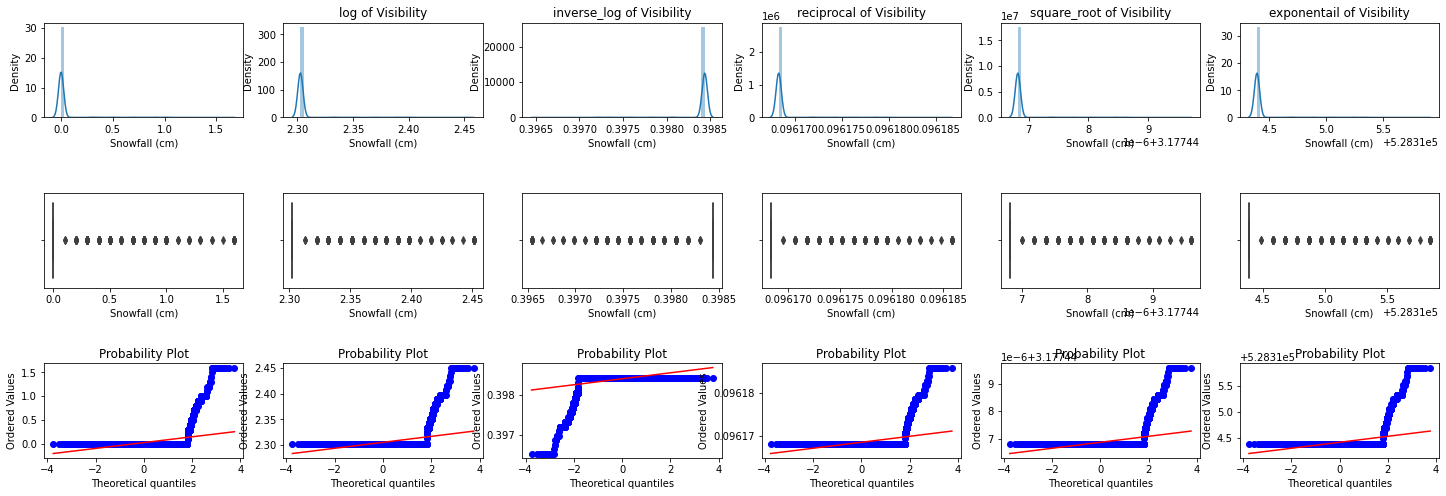

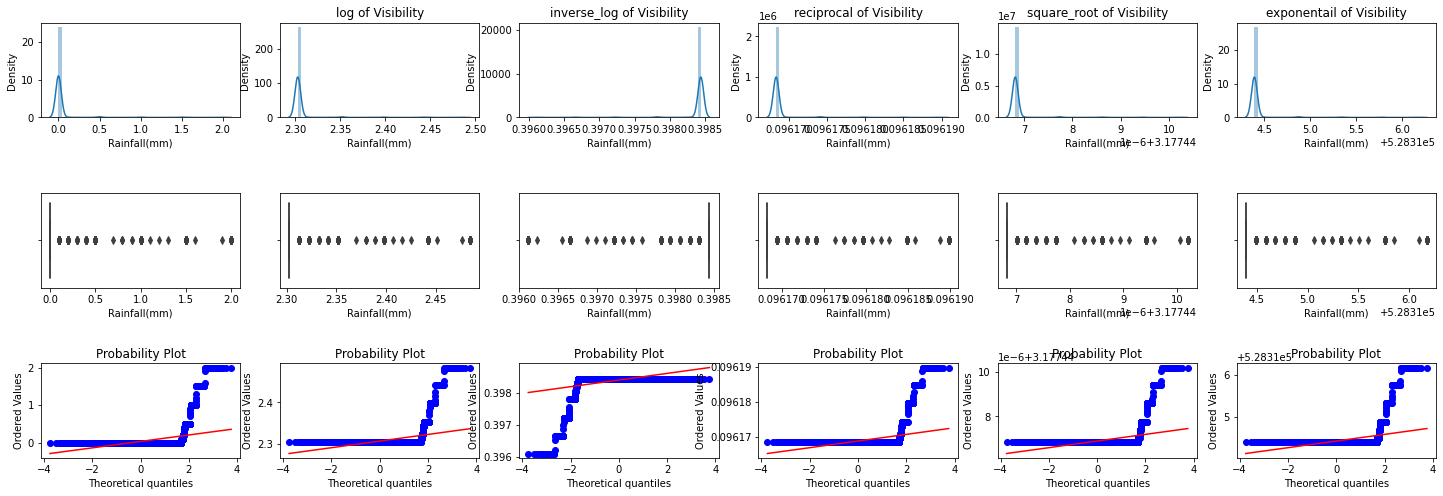

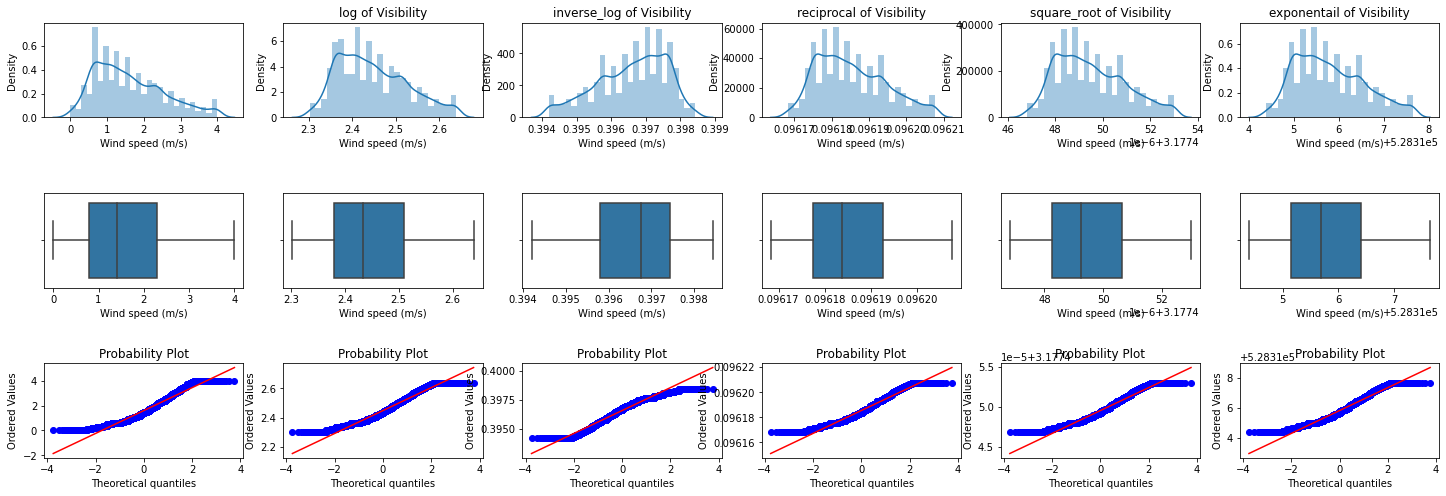

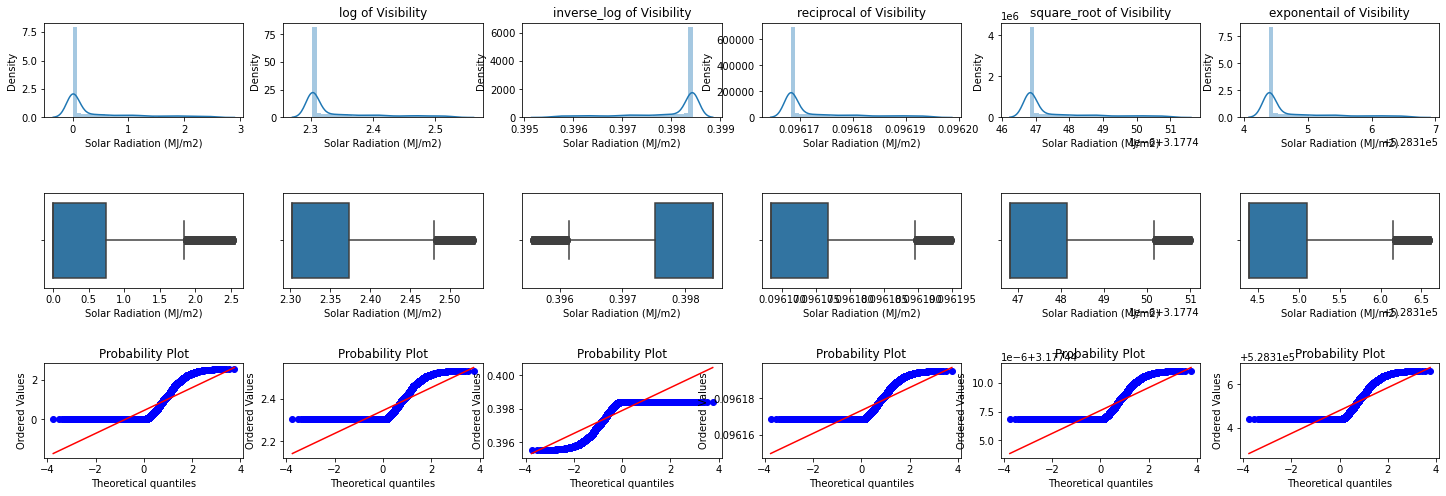

In [517]:
# Displaying transformed data with histogram and qq plot
transform_data_and_plot_dist(handled_data["Snowfall (cm)"],"Visibility",10)
transform_data_and_plot_dist(handled_data["Rainfall(mm)"],"Visibility",10)
transform_data_and_plot_dist(handled_data["Wind speed (m/s)"],"Visibility",10)
transform_data_and_plot_dist(handled_data["Solar Radiation (MJ/m2)"],"Visibility",10)

- By the transformation applied on the data features like Wind speed, Solar radiation, Rainfall, Snowfall we can see     that the data is not normally distributed 
- Tranformations applied on features doesn't work and it doesn't change the distribution,
- Distrubution remains same with lot of outliers

- Most of the assumptions of linear regression are not fullfiled on this data Hence
### Conclusion : Linear Regression model does not perform well on this data as there are lot outliers.
- And some models related to tree and ensembles are perform better for this data 
- Models like Random Forest, Decision Tree,XGboost,Gradient Boost,AdaBoost because there models are robust to outliers.

<a id="transforming_data_forlinear_reg"></a>
# 8. Transforming the data to check model preformance for linear Regression

In [518]:
handled_bike_data=handled_data.copy()

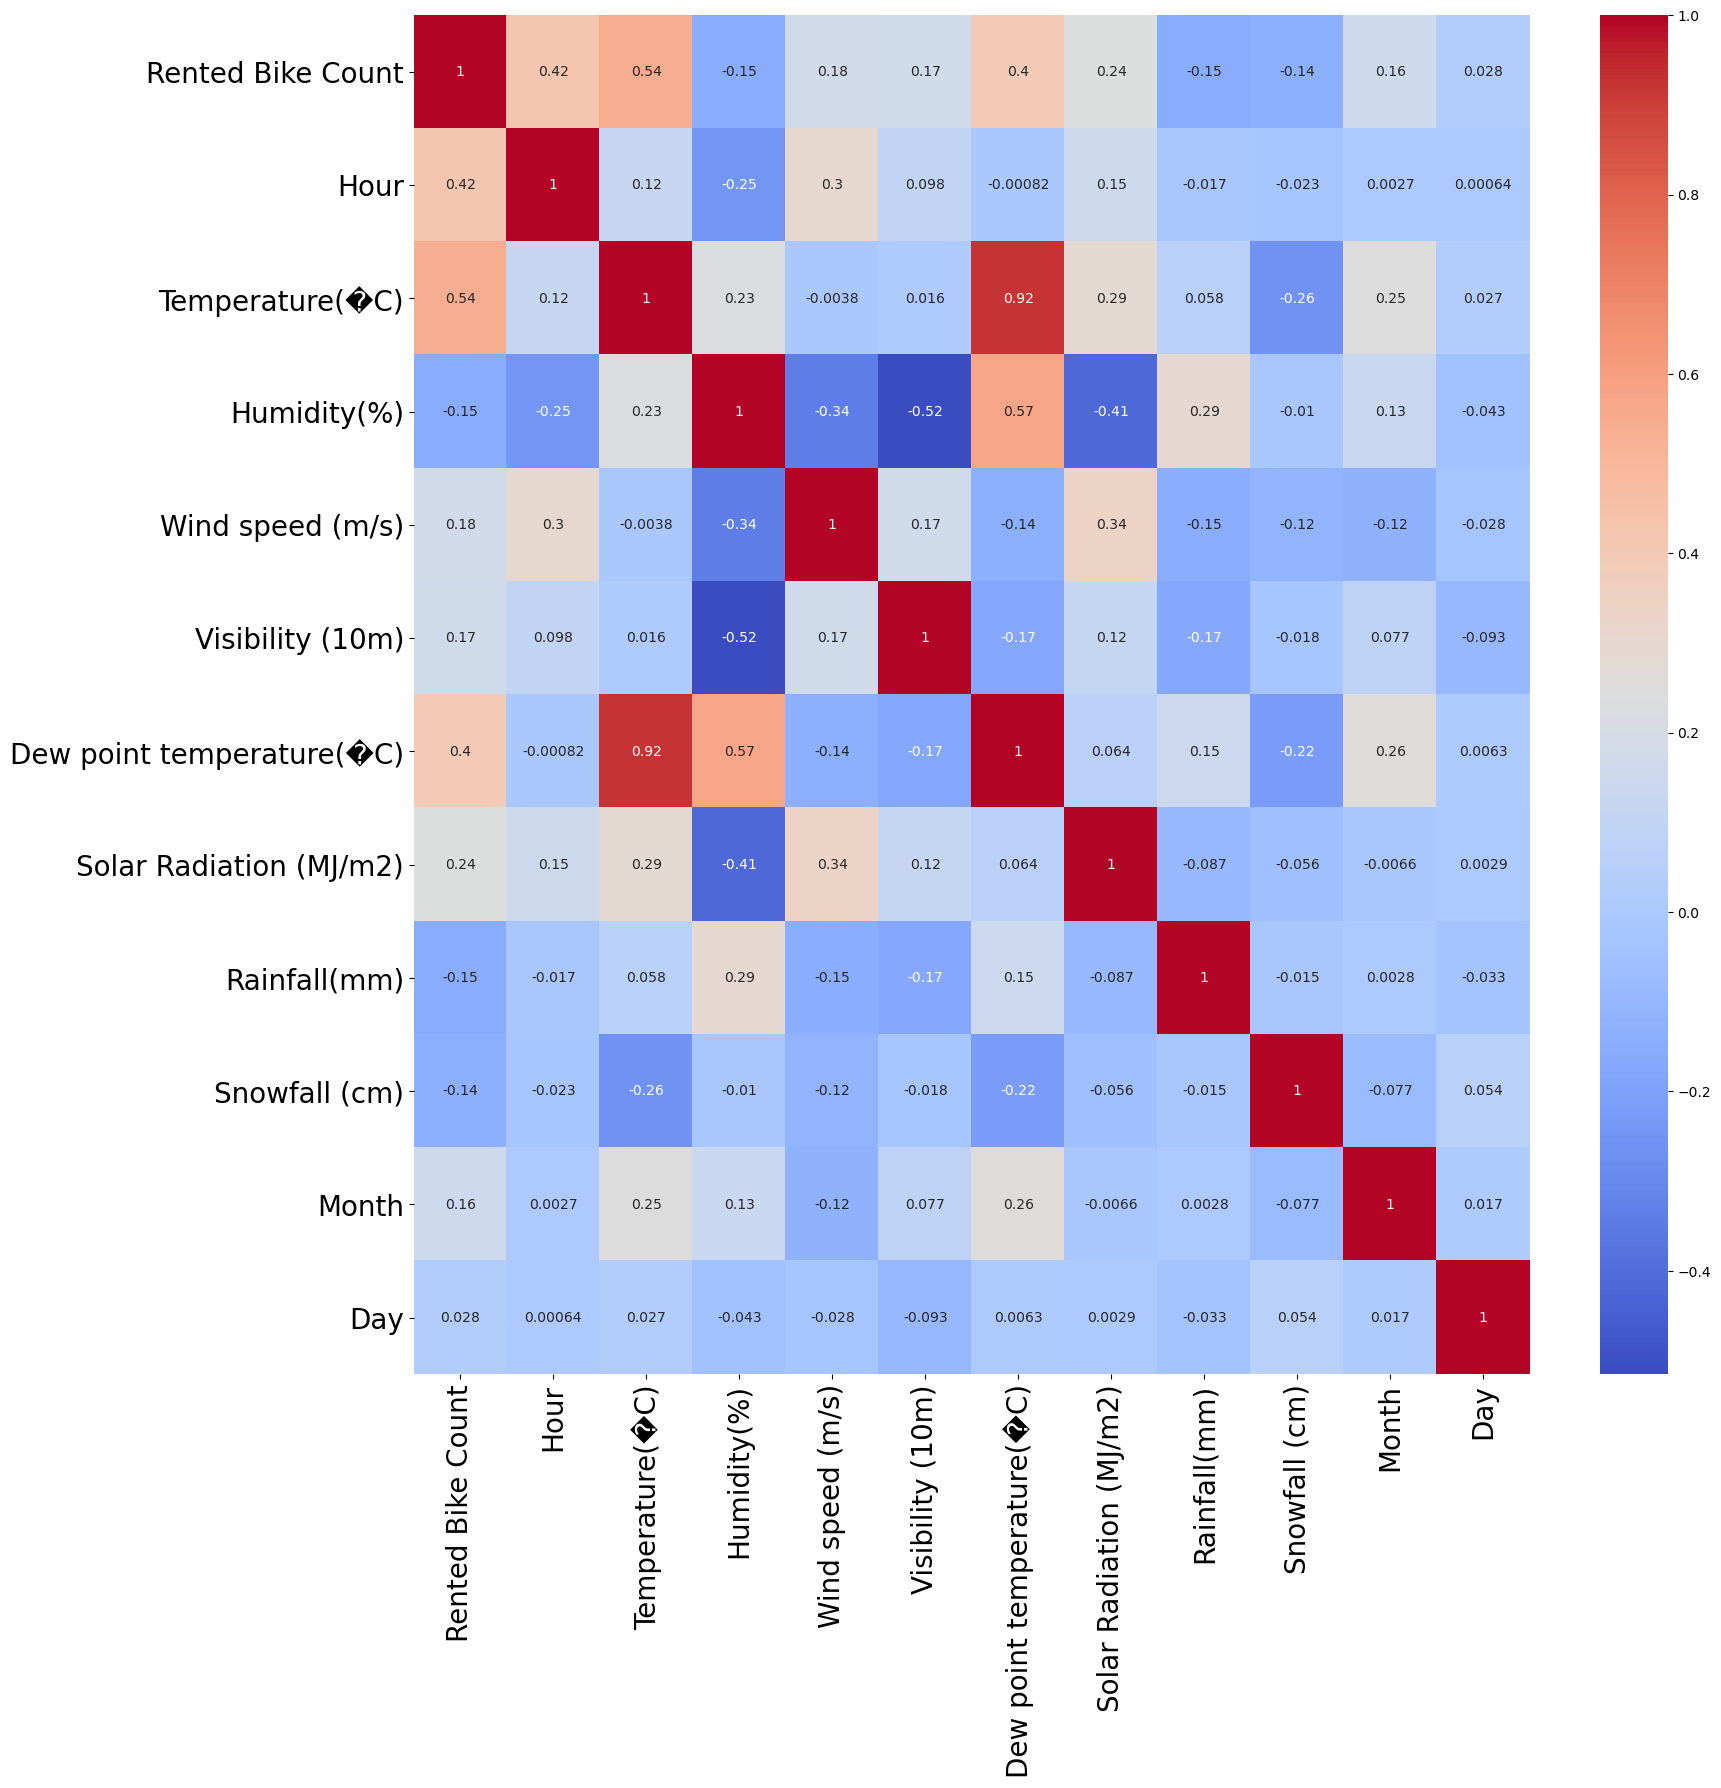

In [519]:
plt.figure(figsize=(18,18),dpi=100) # creating a figure with 2 subplots
plt.xticks(fontsize=20)             # setting the font size of the x-axis
plt.yticks(fontsize=20)             # setting the font size of the y-axis
sns.heatmap(handled_bike_data.corr(),annot=True,cmap="coolwarm"); # plotting the heatmap

- Only ***Due point temperature and Temperature*** are highly correlated to each other

In [520]:
def calc_vif(X):
    """This function calculates the VIF for the numerical columns
    """
    vif_df=pd.DataFrame()   # creating a dataframe to store the vif values
    vif_df["VIF"]= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]   # calculating the vif for each column  
    vif_df["Features"]=X.columns # adding the column name to the dataframe
    return vif_df   # returning the vif dataframe

In [521]:
# storing the numerical columns in a variables features_for_linear_model
features_for_linear_model=numerical_columns   
features_for_linear_model.remove('Rented Bike Count') # removing the column Rented Bike Count
features_for_linear_model 

['Hour',
 'Temperature(�C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(�C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Month',
 'Day']

<a id="Calculating_Variance_inflation_Factor"></a>

In [524]:
# calculating the vif for the numerical columns
calc_vif(bike_data[features_for_linear_model])
# features_for_linear_model.remove('Temperature(�C)')

VIF                   Features
0  3.935537                       Hour
1  7.529879                Humidity(%)
2  4.781143           Wind speed (m/s)
3  5.771939           Visibility (10m)
4  1.697150  Dew point temperature(�C)
5  1.969341    Solar Radiation (MJ/m2)
6  1.081249               Rainfall(mm)
7  1.123575              Snowfall (cm)
8  4.981123                      Month
9  3.839832                        Day

- All Variance inflation values are under 10 
- There is no much colinearity between the features.

In [525]:
# Assigning 1 and 0 to the categorical columns that have two category that are 
# Functional and Non-functional
handled_bike_data['Functioning Day']=handled_bike_data['Functioning Day'].apply(lambda x: 1 if x=='Yes' else 0)
# Holiday and No-Holiday
handled_bike_data['Holiday']=handled_bike_data['Holiday'].apply(lambda x: 1 if x=='No Holiday' else 0)

# Adding the categorical column names to the main_features
features_for_linear_model.extend(['Functioning Day','Holiday']) 


In [526]:
# Adding dummies to the categorical column Season and dropping the first prefix
handled_bike_data=pd.get_dummies(handled_bike_data,columns=["Seasons"],drop_first=True)

In [527]:
# Changing data type of the dummies of Season column from u-int8 to int64 
handled_bike_data["Seasons_Spring"]=handled_bike_data["Seasons_Spring"].astype('int64')
handled_bike_data["Seasons_Summer"]=handled_bike_data["Seasons_Summer"].astype('int64')
handled_bike_data["Seasons_Winter"]=handled_bike_data["Seasons_Winter"].astype('int64')

In [528]:
# Adding the last 3 columns to the main_features dummies of Season column
features_for_linear_model.extend(handled_bike_data.columns[-3:]) 
features_for_linear_model

['Hour',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(�C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Month',
 'Day',
 'Functioning Day',
 'Holiday',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter']

<a id="Data_transformation_for_non_linear_models"></a>
## 9. Data Transformation for other models except Linear Regression

In [529]:

# Assigning 1 and 0 to the categorical columns that have two category that are 
# Functional and Non-functional
bike_data['Functioning Day']=bike_data['Functioning Day'].apply(lambda x: 1 if x=='Yes' else 0)
# Holiday and No-Holiday
bike_data['Holiday']=bike_data['Holiday'].apply(lambda x: 1 if x=='No Holiday' else 0)

# Adding dummies to the categorical column Season and dropping the first prefix
bike_data=pd.get_dummies(bike_data,columns=["Seasons"],drop_first=True)

# Changing data type of the dummies of Season column from u-int8 to int64 
bike_data["Seasons_Spring"]=bike_data["Seasons_Spring"].astype('int64')
bike_data["Seasons_Summer"]=bike_data["Seasons_Summer"].astype('int64')
bike_data["Seasons_Winter"]=bike_data["Seasons_Winter"].astype('int64')




Separate Modified Data for linear Regression and Other Models like (Decision Tree, Random Forest, XGboost, Gradient Boost, AdaBoost)
1.  dataset for Liner Regression - variable_name: hanlded_bike_data 
    - (Sufficient amount of outliers is been handled to expect better performance)
2. dataset for other models - variable name: bike_data 
    - (Outliers are not handled as this data because models used are robust to outliers)

<a id="spitting_data_forlinear_model"></a>
### 8.b Splitting the data into train and test data for linear regression

In [530]:
X=handled_bike_data[features_for_linear_model] 
y=handled_bike_data["Rented Bike Count"] 
X.shape,y.shape

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [531]:
# Creating pandas dataframe to store the model performance 
model_performance_table=pd.DataFrame(columns=["MAE","MSE","RMSE","R2_test","R2_score_train"])

In [249]:
def print_model_results(model,X_train,y_train,X_test,y_test,print_score=False):
    """This function prints the model performance in metrics i.e MAE,MSE,RMSE,R2_test,R2_score_train and stores 
    them in a dataframe and returns the dataframe 


    Args:
        model ([Model instance]): [Model instance need to passed as the first argument]
        X_train ([numpy array or dataframe]): [X_train data]
        y_train ([numpy array]): [actual values of y_train]
        X_test ([numpy array or dataframe]): [X_train data]
        y_test ([numpy array]): [actua; values of y_test]
        print_score (bool, optional): [It prints the score on console if given value i True]. Defaults to False.

    Returns:
        [dataFrame]: [It returns the data frame that contains the model performance metrics]
    """
    model.fit(X_train,y_train); # fitting the model
    MAE=mean_absolute_error(y_test,model.predict(X_test)) # calculating the mean absolute error
    MSE=mean_squared_error(y_test,model.predict(X_test)) # calculating the mean squared error
    RMSE=np.sqrt(MSE)                                      # calculating the root mean squared error
    R2_score_train=f'{np.round(r2_score(y_train,model.predict(X_train)) * 100,2)}%' # calculating the R2 score on train data
    R2_test=f'{np.round(r2_score(y_test,model.predict(X_test)) * 100,2)}%'   # calculating the R2 score on test data
    model_performance_table.loc[model.__class__.__name__,:]=[MAE,MSE,RMSE,R2_test,R2_score_train]
    
    if print_score:
        print(f"{model.__class__.__name__}")
        print(f"MAE: {MAE}")
        print(f"MSE: {MSE}")
        print(f"RMSE: {RMSE}")
        print(f"R2_score_train: {R2_score_train}")
        print(f"R2_test: {R2_test}")
        print("-"*20)
    else:
        return model_performance_table

    
def tune_model(param_grid,model,searchcv,cv=3):
    """There function takes a param_grid and a model and returns the best model by performing tuning

    Args:
        param_grid ([dict]): [It contains the parameters to be tuned related to the model]
        model ([model_instance]): [It contains the model instance on which the parameter will be tuned]

    Returns:
        [cross validation instance]: [It returns the Cross Validation instance]
    """
    grid_search=searchcv(model,param_grid,cv=cv,scoring='r2',verbose=1) # creating the grid search object
    grid_search.fit(X_train,y_train)                                # fitting the grid search object
    return grid_search                                            # returning the grid search object


<a id="linear_reg_results"></a><a id="conclusion_forLinear_reg"></a>

In [250]:

# Checking Linear regresssion model results
print_model_results(LinearRegression(),X_train,y_train,X_test,y_test,print_score=True)


LinearRegression
MAE: 320.5717076219724
MSE: 183100.38888339643
RMSE: 427.90231231368267
R2_score_train: 56.11%
R2_test: 56.92%
--------------------


- As we can see that linear regression performance is not optimum Hence we should try another model like Decision Tree, Random Forest, XGboost, Gradient Boost, AdaBoost 

<a id="hyper_parameter_tuning"></a>
## 10. Now lets try hypertuning with models Like 
1. Decision Tree, 
2. Random Forest, 
3. XGboost, 
4. Gradient Boost, 
5. AdaBoost

<a id="split_data_non_linear"></a>
- Splitting data for non linear models like Decision Tree,and ensembles techniques models

In [50]:
X=bike_data.drop(["Rented Bike Count"],axis=1) 
y=bike_data["Rented Bike Count"]
# Splitting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
# Storing all the best estimators in a dictionary
best_estimators={}

<a id='hypertuning_Decision_tree'></a>

In [52]:
# Hypertuning the Decision Tree Model 
param_grid={'max_depth':[12,13,14,15],'splitter':['best','random'],'min_samples_leaf':[9,10,11,12],'max_leaf_nodes':[None,5,10]}
best_estimators["Decision Tree"]=tune_model(param_grid,DecisionTreeRegressor(),GridSearchCV,cv=10)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


<a id='hypertuning_Random_forest'></a>

In [53]:
# Hypertuning the Random Forest Model
param_grid={'n_estimators':[80,100],
   "max_depth":[None,5,10], "min_samples_leaf":[8,9,10], "max_leaf_nodes":[None,5,10]}
best_estimators["Random Forest"]=tune_model(param_grid,RandomForestRegressor(),RandomizedSearchCV,cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


<a id='hypertuning_AdaBoost'></a>

In [54]:
# Hypertuning the AdaBoost Model
param_grid={"n_estimators":[50,80,100],'loss': ['linear', 'square', 'exponential'],'learning_rate':[0.01,0.05,0.1,1]
            ,}
best_estimators["AdaBoost"]=tune_model(param_grid,AdaBoostRegressor(),RandomizedSearchCV,cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


<a id='hypertuning_GbBoost'></a>

In [55]:
# Hypertuning the Gradient Boosting Model
param_grid={'n_estimators':[80,100,50], 'learning_rate':[0.01,0.05,0.1,1],"min_samples_leaf":[8,9,10],
 "max_leaf_nodes":[None,5,10],'max_features':[None,7,8,10,12],'min_impurity_decrease':[0,0.1,0.3]}
best_estimators["Gradient Boost"]=tune_model(param_grid,GradientBoostingRegressor(),RandomizedSearchCV,cv=10)



Fitting 10 folds for each of 10 candidates, totalling 100 fits


<a id='hypertuning_XGBoost'></a>

In [56]:
# Hypertuning the XGBoost Model
param_grid={'eval_metric':["rmse",'mae'],'eta':[.01,.02,.1,.2],"max_depth":[None,6,7,8,9,10],"gamma":[.5,.9,1.0,1.5,2.0,2.5],
            "lambda":[1,.9,.8,1.5,2,2.5],'alpha':[1.0,.9,.8,1.2] }
best_estimators["XGBoost"]=tune_model(param_grid,XGBRegressor(),RandomizedSearchCV,cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [57]:
best_estimators

{'Decision Tree': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [12, 13, 14, 15],
                          'max_leaf_nodes': [None, 5, 10],
                          'min_samples_leaf': [9, 10, 11, 12],
                          'splitter': ['best', 'random']},
              scoring='r2', verbose=1),
 'Random Forest': RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                    param_distributions={'max_depth': [None, 5, 10],
                                         'max_leaf_nodes': [None, 5, 10],
                                         'min_samples_leaf': [8, 9, 10],
                                         'n_estimators': [80, 100]},
                    scoring='r2', verbose=1),
 'AdaBoost': RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(),
                    param_distributions={'learning_rate': [0.01, 0.05, 0.1, 1],
                                         'loss': ['linear', 'square',
                   

In [58]:
#Iterating over the best estimators dictionary and printing the best model performance
for model_name,model in best_estimators.items():
    model_performance_table=print_model_results(model.best_estimator_,X_train,y_train,X_test,y_test)

<a id='model_performance1'></a>

In [59]:
# Displaying model performance table of all the models and sorting it according to the r2 score
model_performance_table.sort_values(by=["R2_test"],ascending=False,inplace=True)
model_performance_table

MAE            MSE        RMSE R2_test  \
XGBRegressor               127.603121   48342.519273  219.869323   88.4%   
RandomForestRegressor      149.119942   59442.133188  243.807574  85.73%   
GradientBoostingRegressor  176.008939   64348.651005  253.670359  84.56%   
DecisionTreeRegressor      170.133235   80004.770261  282.851145   80.8%   
AdaBoostRegressor          274.256987  136382.867764  369.300511  67.27%   
LinearRegression           320.231853   181527.75053  426.060736  57.29%   

                          R2_score_train  
XGBRegressor                      99.03%  
RandomForestRegressor             91.74%  
GradientBoostingRegressor         90.83%  
DecisionTreeRegressor             89.65%  
AdaBoostRegressor                 66.84%  
LinearRegression                  56.29%

<a id='model_performance_Above_70_1'></a>

In [60]:
# Filtering the model performance table to get the best model that are above 70 % r2 score
model_performance_table[model_performance_table["R2_test"].str.replace("%","").astype(float)>70]

MAE           MSE        RMSE R2_test  \
XGBRegressor               127.603121  48342.519273  219.869323   88.4%   
RandomForestRegressor      149.119942  59442.133188  243.807574  85.73%   
GradientBoostingRegressor  176.008939  64348.651005  253.670359  84.56%   
DecisionTreeRegressor      170.133235  80004.770261  282.851145   80.8%   

                          R2_score_train  
XGBRegressor                      99.03%  
RandomForestRegressor             91.74%  
GradientBoostingRegressor         90.83%  
DecisionTreeRegressor             89.65%

### These are the 4 models that are performing well on the data giving more than 70 % accuracy
1. XGBRegressor
2. RandomForestRegressor
3. GradientBoostingRegressor
4. DecisionTreeRegressor

<a id="check_ci1"></a>
# 12. Lets Check the range of point estimates  for the features in the model

In [61]:
# Creating a dataframe to store the  model performance exptectation
model_performance_expectations=pd.DataFrame(columns=["Mean Accuracy","Std Dev of Accuracy",
"Best Accuracy","C.I. of 95%"])

In [63]:

def KFold_crossValidate(model,model_name,confidence=1.96):
    """This functions performs cross validation on the model given with cross validation of min 50 k folds
    and it returns the mean accuracy, std dev of accuracy,best accuracy and the confidence interval of accuracy 

    Args:
        model ([model instance]): [Model instance on which cross
         validation will be performed] ex : DecisionTreeRegressor() or XGBRegressor() etc..
        model_name ([String]): [name of the model] ex : DecisionTree or XGBoost etc..
        confidence (float, optional): [1.96 is normal value from z statistics for 95% confidence interval]
                . Defaults to 1.96.
    """
    kfold=KFold(n_splits=50,shuffle=True,random_state=7) # creating the kfold object
    results=cross_val_score(model,X,y,cv=kfold,scoring='r2',n_jobs=-1) # performing cross validation
    sns.displot(np.round(results*100.0,2),bins=30)  # plotting the cross validation results
    plt.title(f"Score distribution of {model_name} model")  # title of the plot
    mean=results.mean()                            # mean of the cross validation results
    best=results.max()                           # best accuracy of the cross validation results
    std_dev=results.std()                      # std dev of the cross validation results
    # calculating the confidence interval of the cross validation results
    CI=f'{np.round((mean-confidence*std_dev)*100.0,2)}% to {np.round((mean+confidence*std_dev)*100.0,2)}%'
    # storing the results in the dataframe
    model_performance_expectations.loc[model_name,:]=[mean,std_dev,best,CI]

<a id="score_distribution_Decision_tree"></a>

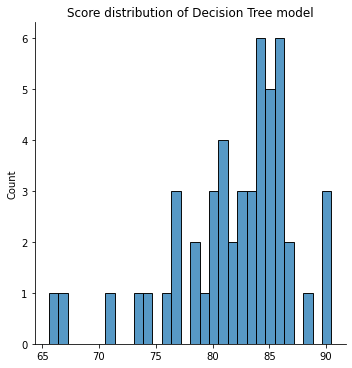

In [64]:
# Performing cross validation for Decision Tree Model and plotting histogram of the cross validation results
KFold_crossValidate(best_estimators["Decision Tree"].best_estimator_,"Decision Tree",confidence=1.96)


<a id="score_distribution_XGBoost"></a>

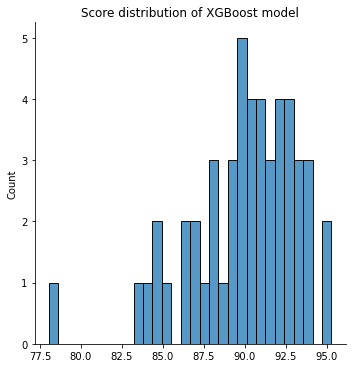

In [65]:
# Performing cross validation for XGBoost Model and plotting histogram of the cross validation results
KFold_crossValidate(best_estimators["XGBoost"].best_estimator_,"XGBoost",confidence=1.96)

<a id="score_distribution_Gradient_Boost"></a>

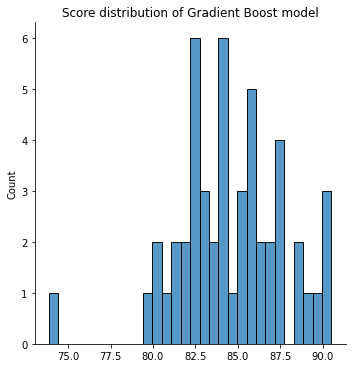

In [66]:
# Performing cross validation for Gradient Boost Model and plotting histogram of the cross validation results
KFold_crossValidate(best_estimators["Gradient Boost"].best_estimator_,"Gradient Boost",confidence=1.96)


<a id="score_distribution_Random_Forest"></a>

<a id="score_distribution_Random_Forest"></a>

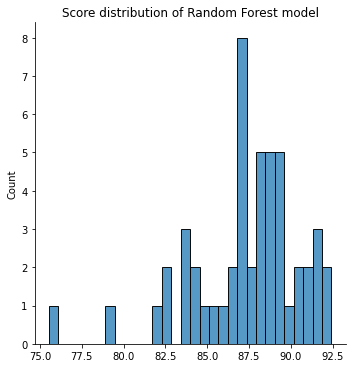

In [67]:
# Performing cross validation for Random Forest Model and plotting histogram of the cross validation results
KFold_crossValidate(best_estimators["Random Forest"].best_estimator_,"Random Forest",confidence=1.96)


In [94]:
feature_importances_table=pd.DataFrame(index=X.columns)
for model_name,model in best_estimators.items():
    pd.DataFrame(index=X.columns,)
    feature_importances_table[model_name]=model.best_estimator_.feature_importances_
feature_importances_table
cm = sns.light_palette("red", as_cmap=True)
# feature_importances_table.style.background_gradient()
feature_importances_table.style.bar(
    subset=['Decision Tree', 'Random Forest',"AdaBoost","Gradient Boost","XGBoost"],
    color='#d65f5f')

<a id="features_importance"></a>
- Displaying Main features according to the models

<a id="display_model_performance"></a>
# Model Performance Chart

In [96]:
model_performance_table[model_performance_table["R2_test"].str.replace("%","").astype(float)>70]

MAE           MSE        RMSE R2_test  \
XGBRegressor               127.603121  48342.519273  219.869323   88.4%   
RandomForestRegressor      149.119942  59442.133188  243.807574  85.73%   
GradientBoostingRegressor  176.008939  64348.651005  253.670359  84.56%   
DecisionTreeRegressor      170.133235  80004.770261  282.851145   80.8%   

                          R2_score_train  
XGBRegressor                      99.03%  
RandomForestRegressor             91.74%  
GradientBoostingRegressor         90.83%  
DecisionTreeRegressor             89.65%

### Below shown table tells 
1. range of accuracy that the model can attain in 95% of the cases.
2. Point estimates accuracy will not be the same case in all the cases it changes
3. Hence 95% of Confidence interval range for the all the models are above 70%
<a id="CI_model_performance"></a>

In [93]:
model_performance_expectations
model_performance_expectations.style.bar(
    subset=['Mean Accuracy',"Best Accuracy"],
    color='#d65f5f')

<a id ="final_conclusion"><a>
## Conclusion : 
## 1. This dataset in not for linear models like Linear regression as there are so much of outliers and assumptions of linear regression are not satisfied 
## 2. So Models Like Decision Tree, Random Forest,Gradient Boost and XGboost are performing well in prediction
### Best Model with (95%) confidence Intervals above 70 %
1. Decision Tree model is expected to have a accuracy between range 71 % to 92 % in 95 % of cases
2. XGBoost model is expected to have a accuracy between range 83 % to 96 % in 95 % of cases
3. Gradient Boost model is expected to have a accuracy between range 78 % to 90 % in 95 % of cases
4. Random Forest model is expected to have a accuracy between range 80 % to 93 % in 95 % of cases